# Proyecto Final - Data Scientist Coderhouse


**Análisis de producción de pollos parrilleros**


**Emilse Bover**


*La producción de pollos parrilleros en Argentina se encuentra concentrada en unas pocas empresas y la mayoría de ellas son de tipo familiar. Las más grandes realizan todos los procesos de la cadena de producción: desde las cabañas de la genética (Abuelos) hasta la distribución en los puntos finales del producto terminado: cadenas de supermercados, minoristas, consumidor directo y puertos (productos de exportación).Los pollos parrilleros se crían en granjas conformadas por galpones en los que se ingresan los animales recién nacidos (pollitos BB), las empresas productoras proveen todos los insumos necesarios para la crianza (alimento, medicamentos, desinfectantes, material de cama, servicios de limpieza, entre otros) y el encargado o dueño de la granja (integrado) se ocupa del manejo de las aves y su ambiente (provisión de agua, alimento, condiciones de temperatura y humedad, etc.). La duración del ciclo de crianza es de aproximadamente 48 días y el peso final de alrededor de 2.8 Kilos. La empresa productora retira los animales para llevarlos al frigorífico. 
La producción se analiza en función de la eficiencia productiva de cada crianza. Una mayor eficiencia significa lograr un animal de mayor peso con el menor consumo de alimento posible ya que el alimento constituye aproximadamente el 70% del costo de producción. La relación alimento consumido/peso final logrado es la conversión alimenticia. El impacto de la mortalidad es negativo y es creciente con la edad: a mayor edad, más cantidad de alimento habrá consumido el ave sin producir kilos.*
*La edad a faena está condicionada por la demanda del sector de ventas: tamaño de las aves, cantidad de kilos; por el ritmo de crecimiento (ganancia media diaria de peso) y por las condiciones sanitarias (enfermedades).
El valor de conversión como indicador productivo tiene la limitación de que no puede ser utilizado para comparar resultados entre granjas y períodos de tiempo por depender de la edad, el peso final y la mortalidad.
Debido a ello se utilizan otros parámetros como la ganancia media diaria de peso (A.D.), la conversión ajustada a un peso teórico (Conversión aj. a 2.7 kg) y la relación Peso/Conversión.*

*El resultado productivo será la resultante de la interacción de los siguientes factores:
•La genética: La línea genética de las aves, el origen y edad de los reproductores (padres), el tipo de huevo que dio origen a los pollitos BB.
•La nutrición: La composición de la dieta, la calidad de las materias primas utilizadas.
•El ambiente: El tipo de galpón de crianza (convencional, ambiente controlado), las condiciones de temperatura y humedad y la disponibilidad de recursos: comederos, bebederos, ventiladores, etc.
•La sanidad: Planes de vacunación y salud intestinal, medicaciones, lavado y desinfección, aplicación de medidas de bioseguridad, etc.
El planteo del presente trabajo es analizar los diferentes factores que impactan sobre la ganancia media diaria de peso y sugerir acciones de manejo para mejorar los valores de este indicador productivo.*

**Definición de objetivo**
El objetivo del presente trabajo es detectar el impacto de los factores que afectan al crecimiento de los pollos parrilleros para tomar decisiones que mejoren los resultados productivos. 

**Contexto comercial**
El retorno económico de la empresa productora de pollos parrilleros depende de la obtención de mejores resultados productivos. A mayor ganancia de peso diaria, por ejemplo, el consumo total de alimento será menor disminuyendo el costo. Otro impacto positivo del aumento de la ganancia de peso diaria es que se reduce la edad a faena de los animales ya que se alcanza el peso deseado en menor cantidad de días. Esta reducción de días permite: liberación de superficie de producción (metros cuadrados de galpón, rotación), menor propensión a sufrir enfermedades y accidentes (por ejemplo cortes de luz). También el dueño de la granja tiene menores costos de luz y gas y por lo tanto obtiene mayor retorno económico al final de la crianza.

**Motivación y audiencia**
La motivación del presente trabajo es hallar relaciones entre los datos provistos por la empresa para mejorar los resultados productivos, esta dirigido a los directivos y los mandos superiores encargados de ejecutar las acciones de cada área productiva.

**Problema comercial**
La empresa plantea los siguientes interrogantes: ¿Por qué la ganancia de peso no es similar en todas las granjas? ¿Por qué tampoco es uniforme a lo largo del año? ¿Es posible predecir el crecimiento en el futuro? ¿El consumo de alimento es el esperado? ¿Qué tiene mayor impacto, el consumo de alimento o las condiciones del ambiente? ¿Es posible mejorar los valores de ganancia de peso manteniendo iguales las condiciones de genética, nutrición y ambiente (en el sentido estricto de la localización geográfica de las granjas)?

**Contexto analítico**
La empresa ha provisto un archivo excel con información de resultados y otros parámetros con localización geográfica, tipo de granja y zona de producción.

**Exploración de datos**
Se confeccionarán gráficos y tablas para explorar los datos provistos y se aplicarán diferentes modelos de machine learning para detectar relaciones entre las variables.



# Importación de librerías

In [58]:
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from numpy import mean
from numpy import std
from prettytable import PrettyTable
import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.express as px
import requests
import seaborn as sns
import statsmodels.api as sm
import xlsxwriter
import ydata_profiling


# Para modelaje:
from imblearn import FunctionSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.spatial import distance
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
import pickle
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



%pip install ipython-autotime
%load_ext autotime
%matplotlib inline


plt.style.use('default')

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime

time: 9.91 s (started: 2023-07-16 13:07:31 -03:00)


# Base de datos

In [59]:
#Ingresos semanales compilado registra resultados finales de la producción en la pestaña BASE. Contiene además datos de genética, nutrición y sanidad.
# Genera una lista de índices de columnas para incluir todas las columnas
all_columns = list(range(67))

# Especifica los índices de las columnas a excluir
excluded_columns = [0, 2, 58, 61, 62, 63]

# Genera una lista de índices de columnas para incluir todas las columnas excepto las excluidas
included_columns = [col_index for col_index in all_columns if col_index not in excluded_columns]

df = pd.read_excel(r"C:\Users\ebover\OneDrive - FRIGORIFICO DE AVES SOYCHU S.A.I.C.F.I.A\ingresos semanales compilado.xlsx",sheet_name='BASE', skiprows=1 , usecols=included_columns)

time: 14.1 s (started: 2023-07-16 13:08:48 -03:00)


## Feature extraction 
Se quitaron de la base valores erróneos y resultados de crianzas para exportación, ya que las curvas de crecimiento en esas condiciones son diferentes.

In [60]:
df.drop(df[(df['A.D.'] >100)].index, inplace=True) #Se eliminan valores erróneos
df.drop(df[(df['Edad'] >70)].index, inplace=True) #Se elimninan edades fuera de estándar
df.drop(df[(df['Destino'] =='EXP')].index, inplace=True) # se eliminan crianzas de pollos enviados a exportación

time: 47 ms (started: 2023-07-16 13:11:04 -03:00)


# Análisis exploratorio de datos

In [208]:
df.shape

(14844, 61)

time: 16 ms (started: 2023-07-15 01:58:11 -03:00)


In [209]:
df.head()

granja  Primer BB  Cantid. BB  A Faena  % a 7 Días  % Mortan.  % Fal.  \
0    2544 2014-11-13       36000    34964        0.55       2.88   -0.33   
1    2558 2014-11-07       57500    54217        0.83       5.71   -0.26   
2    2761 2014-11-13       39000    36483        0.92       6.45   -0.48   
3    2524 2014-11-14       30000    28231        1.35       5.90    1.07   
4    2741 2014-11-14       42000    38912        0.76       7.35    0.19   

   Kg. Pollo  P. Prom.  Kg. Alim.  ...  dada de baja Cuartil EFS 2019  \
0      93360  2.670175     198673  ...           NaN                I   
1     145260  2.679233     335800  ...           NaN               IV   
2     100360  2.750870     228500  ...           NaN                I   
3      77514  2.745705     176157  ...           NaN                I   
4     120920  3.107525     274466  ...             x              NaN   

   % desvío consumo std  EFS según ranking 19  Índice  zona climática  \
0            -10.389276                   NaN       6       Arrecifes   
1            -14.867094                   NaN       7       Arrecifes   
2             -1.227077                   NaN       8      25 de mayo   
3             -1.595289                   NaN      15       Arrecifes   
4              3.530095                   NaN      21       Arrecifes   

   Cuartil EFS 2021  consumo total  Pes conv 2,7  zona prod  
0               NaN       5.682216      1.262878         BA  
1               NaN       6.193629      1.164476         BA  
2               NaN       6.263191      1.194771         BA  
3               NaN       6.239843      1.196094         BA  
4               NaN       7.053505      1.265246         BA  

[5 rows x 61 columns]

time: 32 ms (started: 2023-07-15 01:58:13 -03:00)


La base de datos posee 14.844 filas, cada una de las cuáles representa una crianza de una granja. La base tiene 61 columnas con información sobre las características de la granja, su ubicación y los resultados de producción obtenidos. Posee valores desde el año 2015 hasta el primer semestre del año 2023.

## Tabla exploratoria base de datos

In [210]:
def df_explore(df):
    # Tabla de descripción de las principales características de cada columna de un conjunto de datos
    print( 'Shape: ', df.shape)

    t = PrettyTable(['Variable',
                     'Tipo',
                     'Cant. No Nulos',
                     'Cant. Nulos',
                     '% Nulos',
                     'Valores Únicos',
                     'Ejemplo',
                    ])

    for c in df.columns:
        t.add_row([c,                                                                                         # Variable
                   df[c].dtype,                                                                               # tipo
                   len(df[c])-np.sum(df[c].isna().sort_values(ascending=False)),                              # Cant. No Nulos
                   np.sum(df[c].isna()),                                                                 # Cant. Nulos
                   np.round(df[c].isna().sort_values(ascending=False).sum()/len(df)*100, 2),        # % Nulos
                   np.count_nonzero(df[c].unique()),                                                          # Valores Únicos
                   df[~df[c].isnull()][c].iloc[0],                                                            # Ejemplo
                  ])
    print(t)
    print()
    return

df_explore(df)

Shape:  (14844, 61)
+------------------------------+----------------+----------------+-------------+---------+----------------+---------------------+
|           Variable           |      Tipo      | Cant. No Nulos | Cant. Nulos | % Nulos | Valores Únicos |       Ejemplo       |
+------------------------------+----------------+----------------+-------------+---------+----------------+---------------------+
|            granja            |     int64      |     14844      |      0      |   0.0   |      754       |         2544        |
|          Primer BB           | datetime64[ns] |     14844      |      0      |   0.0   |      1994      | 2014-11-13 00:00:00 |
|          Cantid. BB          |     int64      |     14844      |      0      |   0.0   |      2407      |        36000        |
|           A Faena            |     int64      |     14844      |      0      |   0.0   |     12394      |        34964        |
|          % a 7 Días          |    float64     |     14844      |    

La base posee datos con valores continuos como la ganancia de peso (A.D.), la mortalidad, los kilos de alimento consumido; y valores categóricos como el tipo de granja, la zona de producción, entre otros. Las columnas que poseen valores nulos no serán consideradas en el presente análisis. 

## Análisis univariado

### Histograma de ganancia media diaria de peso (A.D.)

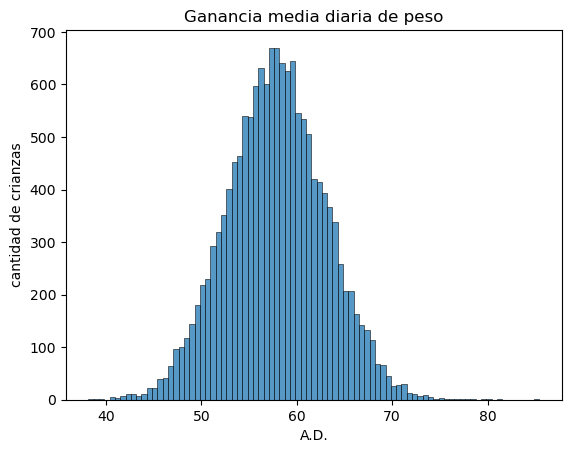

time: 1.06 s (started: 2023-07-14 01:35:32 -03:00)


In [59]:
#Gráfico 1
#Histograma de Ganancia media diaria de peso#
ax=sns.histplot(data=df, x='A.D.')
ax.set(title='Ganancia media diaria de peso', ylabel='cantidad de crianzas');

In [211]:
df['A.D.'].mean()


57.84321296505432

time: 0 ns (started: 2023-07-15 02:00:44 -03:00)


La **ganancia media diaria de peso** es una medida que permite comparar resultados entre granjas y además permite ver la evolución de los resultados globales de la empresa a lo largo del tiempo. A mayor valor, mejor será el resultado. El valor medio es de **57.84** gramos de peso ganados promedio por día y los valores se distribuyen de manera normal.

## Análisis bivariado

### A.D. por año

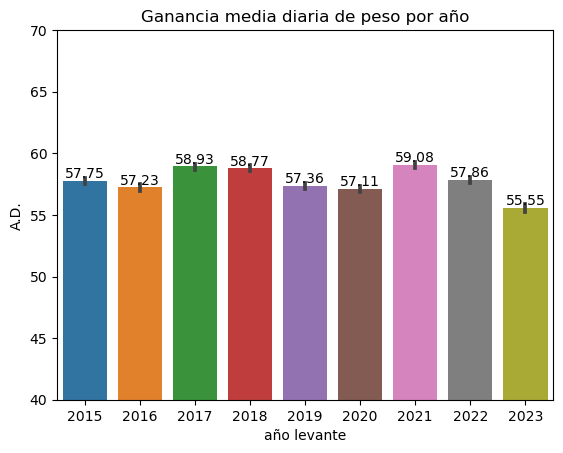

time: 563 ms (started: 2023-07-15 02:00:50 -03:00)


In [212]:
# Gráfico 2
# Ganancia media diaria de peso por año
ax=sns.barplot(data=df, x='año levante',y='A.D.') 
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(ylim=(40, 70))
ax.set(title='Ganancia media diaria de peso por año');

Se observa que las ganancias de peso de los años 2017 y 2021 fueron superiores al resto de los años analizados. 

### A.D. por estación del año

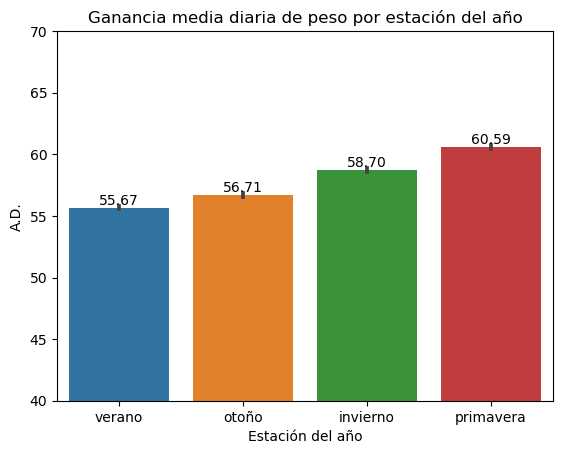

time: 391 ms (started: 2023-07-15 02:00:56 -03:00)


In [213]:
# Gráfico 3
# Ganancia media diaria de peso de por estación del año
ax=sns.barplot(data=df, x='Estación del año',y='A.D.') 
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(ylim=(40, 70))
ax.set(title='Ganancia media diaria de peso por estación del año');

Se observa que la ganancia de peso es variable según la estación del año en la que se desarrolle la crianza, las mayores ganancias de peso ocurren en primavera y las peores en verano dando indicios de que el clima afecta el resultado productivo.

### A.D. por mes del año

In [214]:
# Se crea un diccionario para los meses del año
dic={1:'ene',2:'feb', 3:'mar',4:'abr',5:'may', 6:'jun',7:'jul',8:'ago',9:'sep', 10:'oct',11:'nov', 12:'dic'}
dic

{1: 'ene',
 2: 'feb',
 3: 'mar',
 4: 'abr',
 5: 'may',
 6: 'jun',
 7: 'jul',
 8: 'ago',
 9: 'sep',
 10: 'oct',
 11: 'nov',
 12: 'dic'}

time: 16 ms (started: 2023-07-15 02:01:04 -03:00)


In [215]:
#subset para mes del año
df_3=df[['A.D.','mes levante']]
df_3=df_3.groupby('mes levante').mean().reset_index().round(1)

time: 0 ns (started: 2023-07-15 02:01:09 -03:00)


In [216]:
df_3 = df_3.replace({'mes levante': dic})

time: 16 ms (started: 2023-07-15 02:01:12 -03:00)


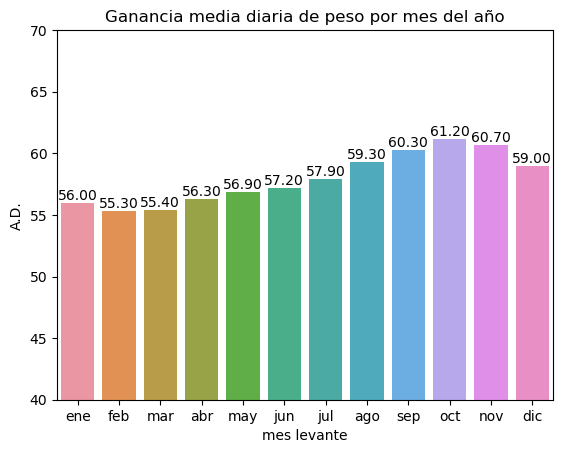

time: 266 ms (started: 2023-07-15 02:01:24 -03:00)


In [217]:
# Gráfico 4
# Ganancia media diaria por mes del año
ax=sns.barplot(data=df_3, x='mes levante',y='A.D.') 
ax.set(ylim=(40, 70))
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(title='Ganancia media diaria de peso por mes del año');

Se observan también diferencias en los valores de ganancia media diaria de peso en los meses del año. Debido a ello a continuación se realizará un análisis según los tipos de ventilación que poseen las granjas.

Las granjas se clasifican en tres categorías:

S: Ventilación forzada: La ventilación del galpón se realiza a través de la entrada del aire por inlets o aberturas en la zona superior de los galpones y su posterior expulsión por extractores.

N: Granjas con sistema de ventilación convencional con encendido manual de ventiladores y/o apertura y cierre de las cortinas laterales del galpón.

MI: Mixtas: Granjas que tienen ambos tipos de galpones.



### Histograma A.D. por tipo de ventilación

In [218]:
# Datos para gráfico 5
serie1 =  df.loc[df['Ventilación forzada'] == 'N' ,'A.D.']
serie2 =  df.loc[df['Ventilación forzada'] == 'S' ,'A.D.']
serie3 =  df.loc[df['Ventilación forzada'] == 'MI' ,'A.D.']

time: 16 ms (started: 2023-07-15 02:01:30 -03:00)


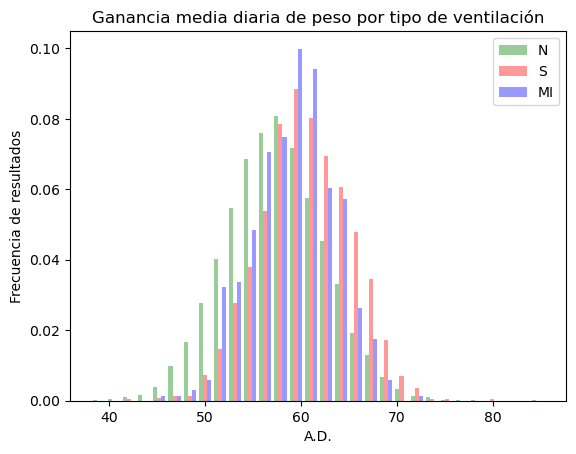

time: 516 ms (started: 2023-07-15 02:01:33 -03:00)


In [219]:
# Gráfico 5
plt.hist([serie1, serie2, serie3], bins=30, density= True, color=['green', 'red','blue'], alpha=0.4)
plt.title('Ganancia media diaria de peso por tipo de ventilación')
plt.xlabel('A.D.')
plt.ylabel('Frecuencia de resultados')
plt.legend(['N', 'S','MI']);

### A.D. por sistema de ventilación 

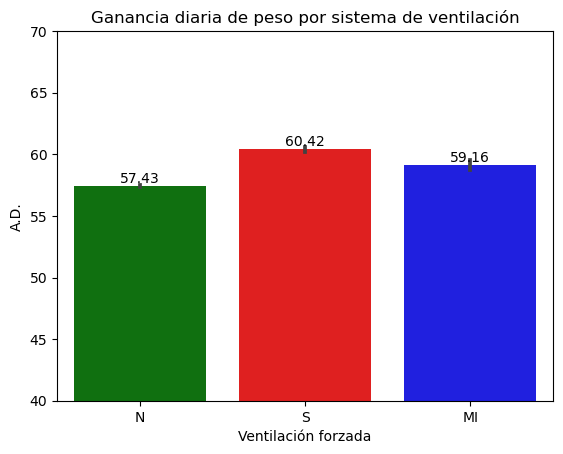

time: 625 ms (started: 2023-07-15 02:01:38 -03:00)


In [220]:
# Gráfico 6
ax=sns.barplot(data=df, x='Ventilación forzada',y='A.D.', order=['N','S','MI'], palette=['green', 'red','blue']) 
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(ylim=(40, 70))
ax.set(title='Ganancia diaria de peso por sistema de ventilación');

Habría indicios de que el sistema de ventilación tiene impacto sobre la ganancia de peso de los animales.

### A.D. por zona de producción

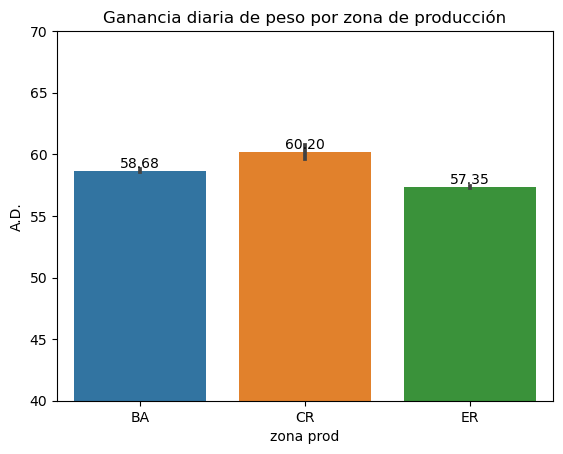

time: 453 ms (started: 2023-07-15 02:01:44 -03:00)


In [221]:
# Gráfico 7
ax=sns.barplot(data=df, x='zona prod',y='A.D.') 
ax.bar_label(ax.containers[0],fmt='%.2f')
ax.set(ylim=(40, 70))
ax.set(title='Ganancia diaria de peso por zona de producción');

A nivel de promedios, hay diferencias entre las zonas del país donde se encuentran ubicadas las granjas.

### A.D. por zona de producción dispersión

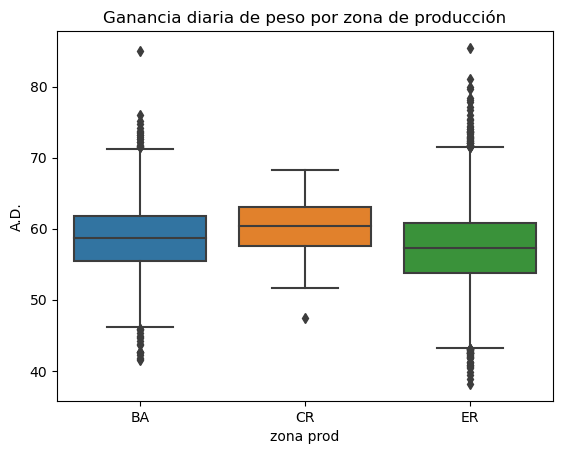

time: 188 ms (started: 2023-07-15 02:01:51 -03:00)


In [222]:
# Gráfico 8
ax=sns.boxplot(data=df, x='zona prod', y='A.D.') 
ax.set(title='Ganancia diaria de peso por zona de producción');

Los mejores resultados se encuentran en la zona de Crespo (CR), no solo porque tiene mayores valores de ganancia de peso sino también porque los resultados tienen menor dispersión y prácticamente no posee resultados atípicos.

### A.D y Consumo medio diario correlación

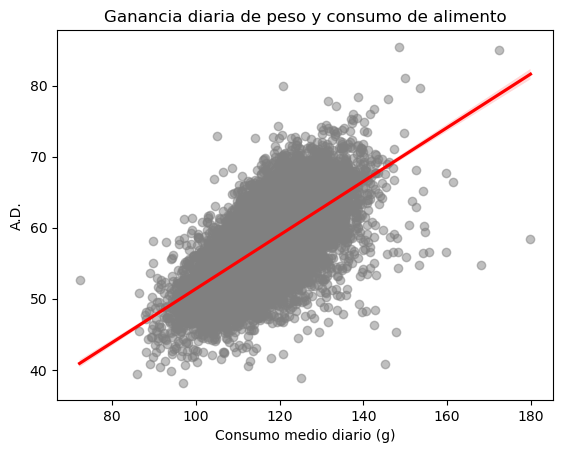

time: 1.16 s (started: 2023-07-15 02:01:59 -03:00)


In [223]:
# Gráfico 9
ax=sns.regplot(data=df, x = 'Consumo medio diario (g)', y = 'A.D.',
            scatter_kws = {"color": "grey", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99)
ax.set(title='Ganancia diaria de peso y consumo de alimento');

Se observa una alta correlación entre la ganancia media diaria de peso y el consumo de alimento. Debido a ello se utilizará la variable Consumo medio diario de alimento (g) como variable dependiente en los modelos de machine learning de regresión que se probarán. A continuación se confeccionarán también modelos de clasificación y agrupación para relacionar la variable ganancia de peso con otros indicadores productivos y con las características de las granjas, su ubicación y el efecto del clima.

# Preparación de los datos

In [224]:
#Se renombran valores de diferentes columnas para evitar duplicados al codificar las variables categóricas
df.loc[df['Ambiente controlado'] == 'N', 'Ambiente controlado'] = 'no'
df.loc[df['Ambiente controlado'] == 'S', 'Ambiente controlado'] = 'si'
df.loc[df['zona climática'] == 'Arrecifes', 'zona climática'] = 'Arrecifes_BA'
df.loc[df['zona climática'] == 'Crespo', 'zona climática'] = 'Crespo_ER'



time: 0 ns (started: 2023-07-15 02:02:27 -03:00)


Se seleccionan las variables que pueden tener impacto en el consumo de alimento

In [225]:
#Creación del subset para los modelos de regresión
dfm=df[['Días de receso corregido','granja','Cantid. BB','% a 7 Días','% Mortan.','Edad','mes levante','Consumo medio diario (g)','Estación del año','Densidad','Ventilación forzada','Ambiente controlado','localidad','zona climática','zona prod' ]]
dfm.head()

Días de receso corregido  granja  Cantid. BB  % a 7 Días  % Mortan.  Edad  \
0                        14    2544       36000        0.55       2.88  49.0   
1                        12    2558       57500        0.83       5.71  52.9   
2                        11    2761       39000        0.92       6.45  49.0   
3                         9    2524       30000        1.35       5.90  49.0   
4                        10    2741       42000        0.76       7.35  51.0   

   mes levante  Consumo medio diario (g) Estación del año   Densidad  \
0            1                115.963592           verano  12.000000   
1            1                117.081839           verano  10.454545   
2            1                127.820226           verano   9.470000   
3            1                127.343729           verano  10.000000   
4            1                138.304026           verano  10.769231   

  Ventilación forzada Ambiente controlado  localidad zona climática zona prod  
0                   S                  no  San Pedro   Arrecifes_BA        BA  
1                   N                  no      Salto   Arrecifes_BA        BA  
2                   N                  no  Chivilcoy     25 de mayo        BA  
3                   N                  no  San Pedro   Arrecifes_BA        BA  
4                   N                  no  Arrecifes   Arrecifes_BA        BA

time: 15 ms (started: 2023-07-15 02:02:37 -03:00)


In [226]:
dfm.shape

(14844, 15)

time: 0 ns (started: 2023-07-15 02:02:41 -03:00)


## Detección de outliers

### Consumo medio diario de alimento dispersión

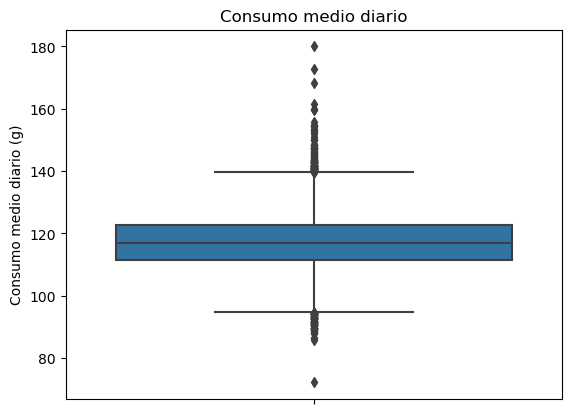

time: 172 ms (started: 2023-07-15 02:02:55 -03:00)


In [227]:
#Gráfico 10
ax=sns.boxplot(data=dfm, y='Consumo medio diario (g)') 
ax.set(title='Consumo medio diario');

Se observa una gran cantidad de valores outliers para la variable consumo por lo que eliminarán del subset generado para el análisis

## Ingeniería de factores

Se eliminarán los valores outliers según cuartiles +-1.5 desvíos estándar.

In [228]:
# Se eliminan las filas cuyos valores están por encima y debajo de los cuartiles + 1.5 desvíos.
from scipy import stats


Q1 = dfm['Consumo medio diario (g)'].quantile(q=.25)
Q3 = dfm['Consumo medio diario (g)'].quantile(q=.75)
IQR = Q3-Q1


dfm = dfm[~((dfm['Consumo medio diario (g)'] < (Q1-1.5*IQR)) | (dfm['Consumo medio diario (g)'] > (Q3+1.5*IQR)))]


dfm.shape


(14637, 15)

time: 16 ms (started: 2023-07-15 02:05:12 -03:00)


In [229]:
Q1

111.35981481481481

time: 16 ms (started: 2023-07-15 02:05:18 -03:00)


In [230]:
Q3

122.62942687228211

time: 0 ns (started: 2023-07-15 02:05:20 -03:00)


In [231]:
IQR

11.269612057467299

time: 15 ms (started: 2023-07-15 02:05:23 -03:00)


In [232]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14637 entries, 0 to 15963
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Días de receso corregido  14637 non-null  int64  
 1   granja                    14637 non-null  int64  
 2   Cantid. BB                14637 non-null  int64  
 3   % a 7 Días                14637 non-null  float64
 4   % Mortan.                 14637 non-null  float64
 5   Edad                      14637 non-null  float64
 6   mes levante               14637 non-null  int64  
 7   Consumo medio diario (g)  14637 non-null  float64
 8   Estación del año          14637 non-null  object 
 9   Densidad                  14637 non-null  float64
 10  Ventilación forzada       14637 non-null  object 
 11  Ambiente controlado       14637 non-null  object 
 12  localidad                 14637 non-null  object 
 13  zona climática            14637 non-null  object 
 14  zona prod  

Quedan 14637 filas con valores no nulos para analizar.

### Tabla descriptiva de datos 

In [41]:
dfm.describe().round(2).T

count      mean       std      min       25%  \
Días de receso corregido  14637.0     22.69      5.68     3.00     18.00   
granja                    14637.0   1655.92   1005.66    10.00    691.00   
Cantid. BB                14637.0  50999.59  48305.95  1575.00  19800.00   
% a 7 Días                14637.0      1.59      1.11     0.00      0.94   
% Mortan.                 14637.0      8.28      5.13     0.00      4.86   
Edad                      14637.0     48.44      3.10    33.00     46.50   
mes levante               14637.0      6.30      3.47     1.00      3.00   
Consumo medio diario (g)  14637.0    116.96      8.25    94.62    111.42   
Densidad                  14637.0     11.37      1.31     4.38     10.55   

                               50%       75%        max  
Días de receso corregido     22.00     29.00      30.00  
granja                     1740.00   2684.00    2965.00  
Cantid. BB                36400.00  64000.00  387500.00  
% a 7 Días                    1.34      1.93      36.26  
% Mortan.                     6.94     10.14      57.21  
Edad                         48.30     50.40      62.00  
mes levante                   6.00      9.00      12.00  
Consumo medio diario (g)    116.80    122.53     139.51  
Densidad                     11.06     12.00      17.20

time: 125 ms (started: 2023-07-14 01:30:15 -03:00)


# Encoding

## Transformaciones categóricas

In [233]:
#Se transforman las variables categóricas con OneHotEncoder
encoder = OneHotEncoder()
data = encoder.fit_transform(dfm['Estación del año'].values.reshape(-1, 1))
data
data = encoder.fit_transform(dfm['Estación del año'].values.reshape(-1, 1)).toarray()
data

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

time: 16 ms (started: 2023-07-15 02:10:24 -03:00)


In [234]:
encoder.categories_

[array(['invierno', 'otoño', 'primavera', 'verano'], dtype=object)]

time: 0 ns (started: 2023-07-15 02:10:28 -03:00)


In [235]:
dfm = pd.concat([dfm.drop('Estación del año', axis = 1), pd.DataFrame(data, columns=encoder.categories_[0], index=dfm.index)], axis='columns')

time: 15 ms (started: 2023-07-15 02:10:31 -03:00)


In [236]:
encoder = OneHotEncoder()
data = encoder.fit_transform(dfm['Ambiente controlado'].values.reshape(-1, 1))
data
data = encoder.fit_transform(dfm['Ambiente controlado'].values.reshape(-1, 1)).toarray()
data
encoder.categories_
dfm = pd.concat([dfm.drop('Ambiente controlado', axis = 1), pd.DataFrame(data, columns=encoder.categories_[0], index=dfm.index)], axis='columns')


time: 16 ms (started: 2023-07-15 02:10:34 -03:00)


In [237]:
encoder = OneHotEncoder()
data = encoder.fit_transform(dfm['localidad'].values.reshape(-1, 1))
data
data = encoder.fit_transform(dfm['localidad'].values.reshape(-1, 1)).toarray()
data
encoder.categories_
dfm = pd.concat([dfm.drop('localidad', axis = 1), pd.DataFrame(data, columns=encoder.categories_[0], index=dfm.index)], axis='columns')

time: 31 ms (started: 2023-07-15 02:10:37 -03:00)


In [238]:
encoder = OneHotEncoder()
data = encoder.fit_transform(dfm['zona climática'].values.reshape(-1, 1))
data
data = encoder.fit_transform(dfm['zona climática'].values.reshape(-1, 1)).toarray()
data
encoder.categories_
dfm = pd.concat([dfm.drop('zona climática', axis = 1), pd.DataFrame(data, columns=encoder.categories_[0], index=dfm.index)], axis='columns')

time: 16 ms (started: 2023-07-15 02:10:39 -03:00)


In [239]:
encoder = OneHotEncoder()
data = encoder.fit_transform(dfm['zona prod'].values.reshape(-1, 1))
data
data = encoder.fit_transform(dfm['zona prod'].values.reshape(-1, 1)).toarray()
data
encoder.categories_
dfm = pd.concat([dfm.drop('zona prod', axis = 1), pd.DataFrame(data, columns=encoder.categories_[0], index=dfm.index)], axis='columns')

time: 31 ms (started: 2023-07-15 02:10:41 -03:00)


In [240]:
encoder = OneHotEncoder()
data = encoder.fit_transform(dfm['Ventilación forzada'].values.reshape(-1, 1))
data
data = encoder.fit_transform(dfm['Ventilación forzada'].values.reshape(-1, 1)).toarray()
data
encoder.categories_
dfm = pd.concat([dfm.drop('Ventilación forzada', axis = 1), pd.DataFrame(data, columns=encoder.categories_[0], index=dfm.index)], axis='columns')


time: 31 ms (started: 2023-07-15 02:10:44 -03:00)


In [241]:
dfm.isna().sum()

Días de receso corregido    0
granja                      0
Cantid. BB                  0
% a 7 Días                  0
% Mortan.                   0
                           ..
CR                          0
ER                          0
MI                          0
N                           0
S                           0
Length: 67, dtype: int64

time: 0 ns (started: 2023-07-15 02:10:47 -03:00)


In [242]:
dfm.shape

(14637, 67)

time: 0 ns (started: 2023-07-15 02:10:51 -03:00)


In [243]:
columns_names = dfm.columns.values
columns_names

array(['Días de receso corregido', 'granja', 'Cantid. BB', '% a 7 Días',
       '% Mortan.', 'Edad', 'mes levante', 'Consumo medio diario (g)',
       'Densidad', 'invierno', 'otoño', 'primavera', 'verano', 'no', 'si',
       ' Aldea San Antonio', 'Aldea Asunción', 'Arrecifes', 'Basavilbaso',
       'Bragado', 'Capitán Sarmiento', 'Carbó', 'Carmen de Areco',
       'Cañuelas', 'Chivilcoy', 'Colonia Elía', 'Colón BA', 'Colón ER',
       'Concepción del Uruguay', 'Crespo', 'Escobar', 'Galarza',
       'General Alvear', 'General Belgrano', 'Gualeguay', 'Gualeguaychú',
       'Herrera', 'Larroque', 'Las Flores', 'Lazo', 'Lucas González',
       'Mansilla', 'Mercedes', 'Norberto de la Riestra',
       'Puerta de Crespo', 'Rocamora', 'Roque Pérez', 'Rosario del Tala',
       'Salto', 'San Antonio de Areco', 'San Pedro', 'Santa Anita',
       'Santa Lucía', 'Urdinarrain', 'Villa Elisa', 'Villaguay',
       '25 de mayo', 'Arrecifes_BA', 'C. del Uruguay', 'Crespo_ER',
       'otra ER', 'BA', 'C

time: 0 ns (started: 2023-07-15 02:11:08 -03:00)


In [244]:
duplicate_columns = dfm.columns[dfm.columns.duplicated()]

time: 0 ns (started: 2023-07-15 02:11:10 -03:00)


In [245]:
duplicate_columns

Index([], dtype='object')

time: 0 ns (started: 2023-07-15 02:11:12 -03:00)


Antes de ejecutar los modelos se verificó que no se hayan generado columnas con valores nulos y que se hayan mantenido el total de filas del subset.

# Modelado

# Modelos de regresión

## Generación de datos de entrenamiento y prueba

In [246]:
from sklearn.model_selection import train_test_split

X3=dfm.drop('Consumo medio diario (g)', axis=1) 

y3=dfm['Consumo medio diario (g)']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=42)

time: 32 ms (started: 2023-07-15 02:11:56 -03:00)


## Linear regression

In [247]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X3, y3)
y3_train_pred = model.predict(X3_train)
y3_test_pred = model.predict(X3_test)

lr_test_mse = mean_squared_error(y3_test, y3_test_pred)
lr_train_mse = mean_squared_error(y3_train, y3_train_pred)

lr_test_rmse = np.sqrt(lr_test_mse)
lr_train_rmse = np.sqrt(lr_train_mse)

lr_test_mae = mean_absolute_error(y3_test, y3_test_pred)
lr_train_mae = mean_absolute_error(y3_train, y3_train_pred)

lr_test_r2 = r2_score(y3_test, y3_test_pred)
lr_train_r2 = r2_score(y3_train, y3_train_pred)

time: 78 ms (started: 2023-07-15 02:12:03 -03:00)


## KNN


In [248]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=10)
model.fit(X3, y3)
y3_train_pred = model.predict(X3_train)
y3_test_pred = model.predict(X3_test)



knr_test_mse = mean_squared_error(y3_test, y3_test_pred)
knr_train_mse = mean_squared_error(y3_train, y3_train_pred)

knr_test_rmse = np.sqrt(knr_test_mse)
knr_train_rmse = np.sqrt(knr_train_mse)

knr_test_mae = mean_absolute_error(y3_test, y3_test_pred)
knr_train_mae = mean_absolute_error(y3_train, y3_train_pred)

knr_test_r2 = r2_score(y3_test, y3_test_pred)
knr_train_r2 = r2_score(y3_train, y3_train_pred)

time: 8.28 s (started: 2023-07-15 02:12:08 -03:00)


## Random forest regression

In [249]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X3, y3)
y3_train_pred = model.predict(X3_train)
y3_test_pred = model.predict(X3_test)


rfr_test_mse = mean_squared_error(y3_train, y3_train_pred)
rfr_train_mse = mean_squared_error(y3_test, y3_test_pred)

rfr_test_rmse = np.sqrt(rfr_test_mse)
rfr_train_rmse = np.sqrt(rfr_train_mse)

rfr_test_mae = mean_absolute_error(y3_test, y3_test_pred)
rfr_train_mae = mean_absolute_error(y3_train, y3_train_pred)

rfr_test_r2 = r2_score(y3_test, y3_test_pred)
rfr_train_r2 = r2_score(y3_train, y3_train_pred)

time: 7.52 s (started: 2023-07-15 02:12:26 -03:00)


## Xgboost

In [250]:
! pip install xgboost

time: 8.58 s (started: 2023-07-15 02:12:43 -03:00)


In [251]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=50, random_state=42)
model.fit(X3, y3)
y3_train_pred = model.predict(X3_train)
y3_test_pred = model.predict(X3_test)


xgb_test_mse = mean_squared_error(y3_train, y3_train_pred)
xgb_train_mse = mean_squared_error(y3_test, y3_test_pred)

xgb_test_rmse = np.sqrt(xgb_test_mse)
xgb_train_rmse = np.sqrt(xgb_train_mse)

xgb_test_mae = mean_absolute_error(y3_test, y3_test_pred)
xgb_train_mae = mean_absolute_error(y3_train, y3_train_pred)

xgb_test_r2 = r2_score(y3_test, y3_test_pred)
xgb_train_r2 = r2_score(y3_train, y3_train_pred)

time: 922 ms (started: 2023-07-15 02:12:55 -03:00)


## SVR

In [ ]:
from sklearn.svm import SVR
model = SVR(kernel='linear', C=1e3, gamma=0.1)
model.fit(X3, y3)
y3_train_pred = model.predict(X3_train)
y3_test_pred = model.predict(X3_test)


svr_test_mse = mean_squared_error(y3_train, y3_train_pred)
svr_train_mse = mean_squared_error(y3_test, y3_test_pred)

svr_test_rmse = np.sqrt(svr_test_mse)
svr_train_rmse = np.sqrt(svr_train_mse)

svr_test_mae = mean_absolute_error(y3_test, y3_test_pred)
svr_train_mae = mean_absolute_error(y3_train, y3_train_pred)

svr_test_r2 = r2_score(y3_test, y3_test_pred)
svr_train_r2 = r2_score(y3_train, y3_train_pred)

In [50]:
#Se convirtió la salida de los modelos en un dataframe:

dfr=pd.DataFrame()
dfr['Linear']=None
dfr['KNN']=None
dfr['RF']=None
dfr['XGB']=None
dfr['SVR']=None



time: 16 ms (started: 2023-07-11 00:03:07 -03:00)


In [ ]:
dfr.loc['MSE'] = [lr_test_mse, knr_test_mse, rfr_test_mse,xgb_test_mse,svr_test_mse]
dfr.loc['RMSE'] = [lr_test_rmse, knr_test_rmse, rfr_test_rmse,xgb_test_rmse,svr_test_rmse]
dfr.loc['MAE'] = [lr_test_mae, knr_test_mae, rfr_test_mae,xgb_test_mae,svr_test_mae]
dfr.loc['R2'] = [lr_test_r2, knr_test_r2, rfr_test_r2,xgb_test_r2,svr_test_r2]


NameError: name 'svr_test_mse' is not defined

time: 1.94 s (started: 2023-07-11 00:03:07 -03:00)


## Métricas de los modelos para los datos de prueba

In [52]:
dfr

Empty DataFrame
Columns: [Linear, KNN, RF, XGB, SVR]
Index: []

time: 15 ms (started: 2023-07-11 00:03:35 -03:00)


In [53]:
#Se convirtió la salida de los modelos en un dataframe:

dfr2=pd.DataFrame()
dfr2['Linear']=None
dfr2['KNN']=None
dfr2['RF']=None
dfr2['XGB']=None
dfr2['SVR']=None

dfr2.loc['MSE'] = [lr_train_mse, knr_train_mse, rfr_train_mse,xgb_train_mse, svr_train_mse]
dfr2.loc['RMSE'] = [lr_train_rmse, knr_train_rmse, rfr_train_rmse,xgb_train_rmse,svr_train_rmse ]
dfr2.loc['MAE'] = [lr_train_mae, knr_train_mae, rfr_train_mae,xgb_train_mae, svr_train_mae]
dfr2.loc['R2'] = [lr_train_r2, knr_train_r2, rfr_train_r2,xgb_train_r2, svr_train_r2]


NameError: name 'svr_train_mse' is not defined

time: 31 ms (started: 2023-07-11 00:03:37 -03:00)


## Métricas de los modelos para los datos de entrenamiento

In [54]:
dfr2

Empty DataFrame
Columns: [Linear, KNN, RF, XGB, SVR]
Index: []

time: 15 ms (started: 2023-07-11 00:03:43 -03:00)


Comparando las métricas MSE, RMSE, MAE y R2 de los 4 modelos los mejores valores son para Random Forest en primer lugar y XGB en segundo lugar.

# Validación del modelo

## Stratified-K fold para Random Forest Regressor

In [252]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
# crear el modelo
model = RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)
scores = cross_val_score(model, X3_train, y3_train, cv=7, verbose=1,scoring='neg_mean_absolute_error')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


time: 1.69 s (started: 2023-07-15 02:13:56 -03:00)


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.6s finished


In [253]:
scores

array([-5.90380813, -6.23930999, -5.9131547 , -5.92677953, -5.92431458,
       -6.0307267 , -6.06706368])

time: 31 ms (started: 2023-07-15 02:16:49 -03:00)


Realizando una prueba de cross validation para el modelo de RandomForestRegressor se observa que el modelo es estable ya que al variar la conformación del grupo de datos de entrenamiento los valores de negative MAE obtenidos son similares.

# Modelos de clasificación

## Preparación de los datos

In [61]:
#Creación del subset para los modelos de clasificación

dfc=df[['Distancia a planta alimento','Días de receso corregido','A.D.','% a 7 Días','mes ingreso','Estación del año','Densidad','Ventilación forzada','Ambiente controlado','localidad','zona climática','zona prod' ]]
dfc.head()

Distancia a planta alimento  Días de receso corregido   A.D.  % a 7 Días  \
0                         88.0                        14  54.49        0.55   
1                         75.0                        12  50.63        0.83   
2                        110.0                        11  56.12        0.92   
3                         74.0                         9  56.12        1.35   
4                         29.0                        10  60.98        0.76   

   mes ingreso Estación del año   Densidad Ventilación forzada  \
0           11           verano  12.000000                   S   
1           11           verano  10.454545                   N   
2           11           verano   9.470000                   N   
3           11           verano  10.000000                   N   
4           11           verano  10.769231                   N   

  Ambiente controlado  localidad zona climática zona prod  
0                   N  San Pedro      Arrecifes        BA  
1                   N      Salto      Arrecifes        BA  
2                   N  Chivilcoy     25 de mayo        BA  
3                   N  San Pedro      Arrecifes        BA  
4                   N  Arrecifes      Arrecifes        BA

time: 32 ms (started: 2023-07-16 13:11:27 -03:00)


## Creación de variables

Se crea una nueva variable "Ganancia" para agrupar los valores de ganancia media diaria de peso en tres categorías: "Buena", "Regular" y "Mala".

In [62]:
max= dfc['A.D.'].max()
max
min=dfc['A.D.'].min()
min
(max-min)/3

15.75666666666667

time: 16 ms (started: 2023-07-16 13:11:40 -03:00)


In [63]:
max

85.43

time: 15 ms (started: 2023-07-16 13:11:43 -03:00)


In [64]:
min

38.16

time: 15 ms (started: 2023-07-16 13:11:46 -03:00)


In [65]:
#Creación de una nueva columna para clasificar las granjas según su valor de ganancia de peso

conditionlist = [
    (dfc['A.D.'] >= 69.67) ,
    (dfc['A.D.'] >= 53.91) & (df['A.D.'] <69.67),
    (dfc['A.D.'] < 53.91)]
choicelist = ['Buena', 'Regular', 'Mala']
dfc['Ganancia'] = np.select(conditionlist, choicelist, default='Not Specified')

time: 16 ms (started: 2023-07-16 13:11:48 -03:00)


C:\Users\ebover\AppData\Local\Temp\ipykernel_89980\1559989166.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Ganancia'] = np.select(conditionlist, choicelist, default='Not Specified')


In [66]:
dfc=dfc.drop(['A.D.'], axis=1)

time: 0 ns (started: 2023-07-16 13:11:56 -03:00)


In [67]:
dfc.head()

Distancia a planta alimento  Días de receso corregido  % a 7 Días  \
0                         88.0                        14        0.55   
1                         75.0                        12        0.83   
2                        110.0                        11        0.92   
3                         74.0                         9        1.35   
4                         29.0                        10        0.76   

   mes ingreso Estación del año   Densidad Ventilación forzada  \
0           11           verano  12.000000                   S   
1           11           verano  10.454545                   N   
2           11           verano   9.470000                   N   
3           11           verano  10.000000                   N   
4           11           verano  10.769231                   N   

  Ambiente controlado  localidad zona climática zona prod Ganancia  
0                   N  San Pedro      Arrecifes        BA  Regular  
1                   N      Salto      Arrecifes        BA     Mala  
2                   N  Chivilcoy     25 de mayo        BA  Regular  
3                   N  San Pedro      Arrecifes        BA  Regular  
4                   N  Arrecifes      Arrecifes        BA  Regular

time: 15 ms (started: 2023-07-16 13:11:59 -03:00)


In [68]:
dfc.isna().sum()

Distancia a planta alimento    311
Días de receso corregido         0
% a 7 Días                       0
mes ingreso                      0
Estación del año                 0
Densidad                         0
Ventilación forzada              0
Ambiente controlado              0
localidad                        0
zona climática                   0
zona prod                        0
Ganancia                         0
dtype: int64

time: 31 ms (started: 2023-07-16 13:12:02 -03:00)


In [69]:
dfc=dfc.dropna()

time: 16 ms (started: 2023-07-16 13:12:05 -03:00)


In [70]:
dfc.isna().sum()

Distancia a planta alimento    0
Días de receso corregido       0
% a 7 Días                     0
mes ingreso                    0
Estación del año               0
Densidad                       0
Ventilación forzada            0
Ambiente controlado            0
localidad                      0
zona climática                 0
zona prod                      0
Ganancia                       0
dtype: int64

time: 0 ns (started: 2023-07-16 13:12:07 -03:00)


In [71]:
dfc.shape

(14533, 12)

time: 0 ns (started: 2023-07-16 13:12:10 -03:00)


Se eliminan valores nulos, la base contiene 14533 filas.

### Histograma de ganancia

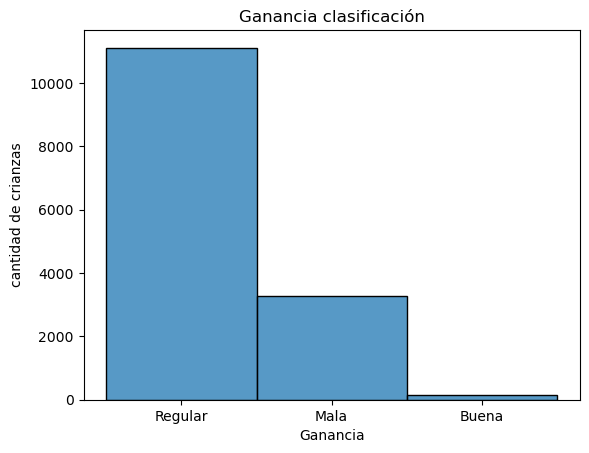

time: 422 ms (started: 2023-07-15 18:49:03 -03:00)


In [15]:
#Gráfico 11
#Histograma de Ganancia#
ax=sns.histplot(data=dfc, x='Ganancia')
ax.set(title='Ganancia clasificación', ylabel='cantidad de crianzas');

La cantidad de valores de cada categoría muestra que su distribución está desbalanceada. Más adelante se realizará un oversampling de los datos.

## Encoding

In [72]:
label_encoder = preprocessing.LabelEncoder()
dfc['Estación del año']= label_encoder.fit_transform(dfc['Estación del año'])
dfc['Estación del año'].unique()

label_encoder = preprocessing.LabelEncoder()
dfc['Ambiente controlado']= label_encoder.fit_transform(dfc['Ambiente controlado'])
dfc['Ambiente controlado'].unique()

label_encoder = preprocessing.LabelEncoder()
dfc['localidad']= label_encoder.fit_transform(dfc['localidad'])
dfc['localidad'].unique()

label_encoder = preprocessing.LabelEncoder()
dfc['zona climática']= label_encoder.fit_transform(dfc['zona climática'])
dfc['zona climática'].unique()

label_encoder = preprocessing.LabelEncoder()
dfc['zona prod']= label_encoder.fit_transform(dfc['zona prod'])
dfc['zona prod'].unique()

label_encoder = preprocessing.LabelEncoder()
dfc['Ventilación forzada']= label_encoder.fit_transform(dfc['Ventilación forzada'])
dfc['Ventilación forzada'].unique()


label_encoder = preprocessing.LabelEncoder()
dfc['Ganancia']= label_encoder.fit_transform(dfc['Ganancia'])
dfc['Ganancia'].unique()



array([2, 1, 0])

time: 46 ms (started: 2023-07-16 13:12:19 -03:00)


## Mapa de calor de correlaciones

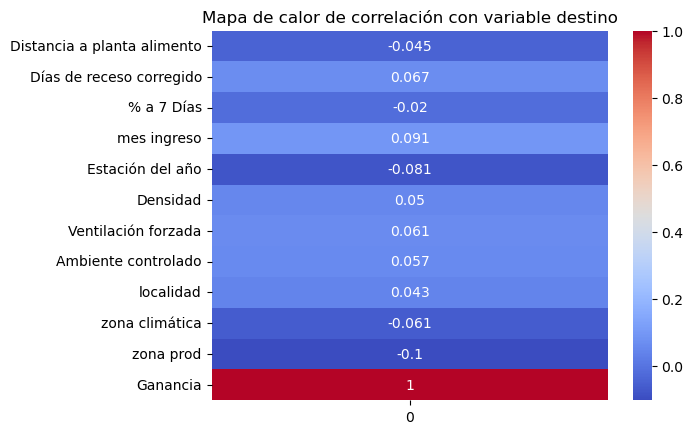

time: 313 ms (started: 2023-07-15 18:49:17 -03:00)


In [17]:
#Gráfico 12
corr = dfc.corr('pearson')
target_corr = corr['Ganancia'].values.reshape(-1,1)

sns.heatmap(target_corr, annot=True, yticklabels= dfc.columns, cmap='coolwarm')
plt.title('Mapa de calor de correlación con variable destino')
plt.show()

Las correlaciones en general son muy bajas, las mayores se dan con las variables zona de producción y mes de ingreso.

## Selección de variables predictoras y destino

In [73]:
# Seleccionar las variables predictoras y la variable de destino
X=dfc.drop('Ganancia', axis=1)
y=dfc['Ganancia']


time: 16 ms (started: 2023-07-16 13:12:42 -03:00)


In [74]:
X

Distancia a planta alimento  Días de receso corregido  % a 7 Días  \
0                             88.0                        14        0.55   
1                             75.0                        12        0.83   
2                            110.0                        11        0.92   
3                             74.0                         9        1.35   
4                             29.0                        10        0.76   
...                            ...                       ...         ...   
15959                        162.0                        23        1.56   
15960                        123.0                        25        1.15   
15961                        123.0                        28        1.19   
15962                        165.0                        25        1.58   
15963                         43.0                        30        3.78   

       mes ingreso  Estación del año   Densidad  Ventilación forzada  \
0               11                 3  12.000000                    2   
1               11                 3  10.454545                    1   
2               11                 3   9.470000                    1   
3               11                 3  10.000000                    1   
4               11                 3  10.769231                    1   
...            ...               ...        ...                  ...   
15959            5                 0  11.042471                    1   
15960            5                 0  13.809524                    2   
15961            5                 0  13.809524                    2   
15962            5                 0  11.000000                    1   
15963            5                 0  11.000000                    1   

       Ambiente controlado  localidad  zona climática  zona prod  
0                        0         32               1          0  
1                        0         30               1          0  
2                        0          9               0          0  
3                        0         32               1          0  
4                        0          2               1          0  
...                    ...        ...             ...        ...  
15959                    0         33               2          1  
15960                    1         22               3          1  
15961                    1         22               3          1  
15962                    0         22               3          1  
15963                    0         18               2          1  

[14533 rows x 11 columns]

time: 31 ms (started: 2023-07-16 13:12:49 -03:00)


In [75]:
y

0        2
1        1
2        2
3        2
4        2
        ..
15959    2
15960    2
15961    2
15962    2
15963    1
Name: Ganancia, Length: 14533, dtype: int32

time: 0 ns (started: 2023-07-16 13:13:00 -03:00)


## Oversampling

Se genera oversampling para equilibrar la cantidad de valores de cada variable destino.

In [76]:
#oversampling
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=12, n_informative=12,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)


X_resampled, y_resampled = ros.fit_resample(X, y)

from collections import Counter

print(sorted(Counter(y_resampled).items()))


[(0, 9335), (1, 9335), (2, 9335)]
time: 31 ms (started: 2023-07-16 13:13:08 -03:00)


## Generación de datos de entrenamiento y prueba

In [77]:
# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=42)

time: 0 ns (started: 2023-07-16 13:13:11 -03:00)


## RandomForestClassifier *4 niveles*


In [28]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(max_depth=4, random_state=42)
clf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

time: 1.41 s (started: 2023-07-15 18:51:08 -03:00)


In [29]:
# Obtener predicciones
y_pred= clf1.predict(X_test)

time: 110 ms (started: 2023-07-15 18:56:11 -03:00)


### Métricas RFC 4

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      2785
           1       0.92      0.82      0.86      2835
           2       0.77      0.87      0.82      2782

    accuracy                           0.83      8402
   macro avg       0.84      0.83      0.83      8402
weighted avg       0.84      0.83      0.83      8402

time: 31 ms (started: 2023-07-15 18:56:24 -03:00)


## RandomForestClassifier *7 niveles*


In [41]:
clf2 = RandomForestClassifier(max_depth=7, random_state=42)
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

time: 2.05 s (started: 2023-07-15 19:28:11 -03:00)


In [42]:
# Obtiene predicciones
y_pred= clf2.predict(X_test)

time: 125 ms (started: 2023-07-15 19:28:16 -03:00)


### Métricas RFC 7

In [43]:
print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2785
           1       0.98      0.95      0.96      2835
           2       0.92      0.95      0.94      2782

    accuracy                           0.95      8402
   macro avg       0.95      0.95      0.95      8402
weighted avg       0.95      0.95      0.95      8402

time: 16 ms (started: 2023-07-15 19:28:18 -03:00)


## Balanced RandomForest Classifier

In [44]:
# Definición del clasificador balanced random forest classifier


brfc = BalancedRandomForestClassifier(n_estimators=1000,max_depth=2,random_state=42)

# Definir la validacion cruzada

cv=RepeatedStratifiedKFold(n_splits=4,n_repeats=2,random_state=42)

# Resultados (ROC)

scoring=cross_val_score(brfc,X_train,y_train,scoring='roc_auc',cv=cv,n_jobs=-1)

time: 41.8 s (started: 2023-07-15 19:28:23 -03:00)


In [45]:
brfc.fit(X_train,y_train)

BalancedRandomForestClassifier(max_depth=2, n_estimators=1000, random_state=42)

time: 15.5 s (started: 2023-07-15 19:29:11 -03:00)


In [46]:
# Predicciones

y_pred = brfc.predict(X_test)

time: 640 ms (started: 2023-07-15 19:29:44 -03:00)


### Métricas BRFC

In [47]:
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59      2785
           1       0.68      0.63      0.65      2835
           2       0.68      0.79      0.73      2782

    accuracy                           0.66      8402
   macro avg       0.66      0.66      0.66      8402
weighted avg       0.66      0.66      0.66      8402

time: 16 ms (started: 2023-07-15 19:30:08 -03:00)


## KNN Classifier

In [52]:
# Crea el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)

time: 0 ns (started: 2023-07-15 19:30:35 -03:00)


In [53]:
# Entrena el clasificador
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

time: 109 ms (started: 2023-07-15 19:30:37 -03:00)


In [54]:
# Realiza predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


time: 1.06 s (started: 2023-07-15 19:30:39 -03:00)


### Métricas KNNC

In [55]:
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2785
           1       0.99      1.00      0.99      2835
           2       1.00      0.97      0.99      2782

    accuracy                           0.99      8402
   macro avg       0.99      0.99      0.99      8402
weighted avg       0.99      0.99      0.99      8402

time: 31 ms (started: 2023-07-15 19:30:42 -03:00)


Las métricas de los modelos aplicados fueron mejores para RandomForestClasiffier con 7 niveles. KNN arrojó valores de F1-score y accurary de 99% por lo que posible haya overfitting de datos para este modelo. A continuación se utilizará un modelo GridSearchCV utilizando los valores originales sin oversampling.

## GridSearchCV

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

time: 0 ns (started: 2023-07-16 13:13:44 -03:00)


### Generación de datos de entrenamiento y prueba

In [79]:
# Seleccionar las variables predictoras y la variable de destino
X1=dfc.drop('Ganancia', axis=1)
y1=dfc['Ganancia']

time: 15 ms (started: 2023-07-16 13:15:13 -03:00)


In [80]:
# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.3, random_state=42)

time: 0 ns (started: 2023-07-16 13:16:28 -03:00)


In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_train)

time: 47 ms (started: 2023-07-16 13:16:31 -03:00)


In [82]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_test_pred)

time: 188 ms (started: 2023-07-16 13:16:35 -03:00)


c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [83]:
acc

0.7658256880733945

time: 0 ns (started: 2023-07-16 13:16:38 -03:00)


In [84]:
X_test_pca = pca.fit_transform(X_test)

time: 16 ms (started: 2023-07-16 13:18:02 -03:00)


In [85]:
knn.fit(X_pca, y_train)
y_pca_pred = knn.predict(X_test_pca)
acc = accuracy_score(y_test, y_pca_pred)
acc

c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7229357798165138

time: 125 ms (started: 2023-07-16 13:18:16 -03:00)


In [86]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_neighbors': list(range(5, 51)), # nro vecinos
    'weights': ['uniform', 'distance'], # distribución
    'p': list(range(1, 11)) # distancia
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Mejores hiperparámetros:", best_params)
print("Precisión del modelo:", accuracy)

c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\ebover\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [ ]:
classifiers = []
classifiers.append(('Support Vector Classifier', SVC(kernel='linear')))
classifiers.append(('K-Nearest Neighbors',KNeighborsClassifier(n_neighbors=3)))
classifiers.append(('Decision Tree', DecisionTreeClassifier()))
classifiers.append(('eXtreme Gradient Boosting', XGBClassifier()))
classifiers.append(('RandomForestClassifier', RandomForestClassifier()))

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
y = np.where(y == 3, 0, y)

In [ ]:
kfold = StratifiedKFold(n_splits=10)
resultados = []
for name, classifier in classifiers:
    result = cross_val_score(classifier, X, y, cv=kfold)
    resultados.append((name, result))

In [ ]:
results = pd.DataFrame(resultados, columns=['classifier','cvscore'])
results['cvscore'] = [np.mean(i) for i in results['cvscore']]

In [ ]:
resultados

In [ ]:
results

In [ ]:
sns.set_style('whitegrid')
ax = sns.barplot(x='cvscore',y='classifier', data=results.sort_values('cvscore'), palette='Blues_d')
ax.set(xlabel='Cross Validation Score', ylabel='')

In [ ]:
X_test[y_test_pred != y_test]

In [ ]:
param_grid = {
    'n_estimators': list(range(50, 1001, 100)),
    'max_depth': list(range(2, 11, 2)),
    'min_samples_split': list(range(2, 11, 2))
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Mejores hiperparámetros:", best_params)
print("Precisión del modelo:", accuracy)

# Boosting

## XGBoost Classifier

In [425]:
# Seleccionar las variables predictoras y la variable de destino
X1=dfc.drop('Ganancia', axis=1) 
y1=dfc['Ganancia']

time: 0 ns (started: 2023-07-15 04:24:20 -03:00)


In [426]:
# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.3, random_state=42)

time: 0 ns (started: 2023-07-15 04:24:23 -03:00)


In [427]:
# Crear el clasificador XGBoost
xgb_clf = xgb.XGBClassifier()

time: 0 ns (started: 2023-07-15 04:24:26 -03:00)


In [428]:
# Entrena el clasificador
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

time: 1 s (started: 2023-07-15 04:24:29 -03:00)


In [429]:
# Realiza predicciones en el conjunto de prueba
y_pred = xgb_clf.predict(X_test)

time: 15 ms (started: 2023-07-15 04:24:35 -03:00)


### Métricas XGBC

In [430]:
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       0.50      0.06      0.10        54
           1       0.58      0.37      0.45       967
           2       0.82      0.92      0.87      3339

    accuracy                           0.79      4360
   macro avg       0.64      0.45      0.47      4360
weighted avg       0.77      0.79      0.77      4360

time: 15 ms (started: 2023-07-15 04:24:39 -03:00)


# Modelos de Agrupación

In [16]:
#Creación del subset para los modelos de agrupación

dfa=df[['Distancia a planta alimento','Días de receso corregido','A.D.','% a 7 Días','Densidad','Consumo medio diario (g)' ]]
dfa.head()

Distancia a planta alimento  Días de receso corregido   A.D.  % a 7 Días  \
0                         88.0                        14  54.49        0.55   
1                         75.0                        12  50.63        0.83   
2                        110.0                        11  56.12        0.92   
3                         74.0                         9  56.12        1.35   
4                         29.0                        10  60.98        0.76   

    Densidad  Consumo medio diario (g)  
0  12.000000                115.963592  
1  10.454545                117.081839  
2   9.470000                127.820226  
3  10.000000                127.343729  
4  10.769231                138.304026

time: 62 ms (started: 2023-07-14 21:56:26 -03:00)


In [17]:
dfa.shape

(14844, 6)

time: 15 ms (started: 2023-07-14 21:56:29 -03:00)


In [18]:
dfa=dfa.dropna()

time: 0 ns (started: 2023-07-14 21:56:31 -03:00)


In [19]:
dfa.isna().sum()

Distancia a planta alimento    0
Días de receso corregido       0
A.D.                           0
% a 7 Días                     0
Densidad                       0
Consumo medio diario (g)       0
dtype: int64

time: 0 ns (started: 2023-07-14 21:56:34 -03:00)


In [20]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14533 entries, 0 to 15963
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Distancia a planta alimento  14533 non-null  float64
 1   Días de receso corregido     14533 non-null  int64  
 2   A.D.                         14533 non-null  float64
 3   % a 7 Días                   14533 non-null  float64
 4   Densidad                     14533 non-null  float64
 5   Consumo medio diario (g)     14533 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 794.8 KB
time: 31 ms (started: 2023-07-14 21:56:36 -03:00)


In [21]:
dfa.describe()

Distancia a planta alimento  Días de receso corregido          A.D.  \
count                 14533.000000              14533.000000  14533.000000   
mean                     96.867612                 22.708319     57.818689   
std                      65.350693                  5.657125      5.182100   
min                       2.000000                  3.000000     38.160000   
25%                      45.000000                 18.000000     54.340000   
50%                      82.000000                 23.000000     57.810000   
75%                     152.000000                 29.000000     61.250000   
max                     327.000000                 30.000000     85.430000   

         % a 7 Días      Densidad  Consumo medio diario (g)  
count  14533.000000  14533.000000              14533.000000  
mean       1.583561     11.356852                117.054440  
std        1.109740      1.313197                  8.845423  
min        0.000000      4.666667                 72.179504  
25%        0.930000     10.545455                111.350000  
50%        1.340000     11.055556                116.829787  
75%        1.920000     12.000000                122.648936  
max       36.260000     17.200000                179.968627

time: 47 ms (started: 2023-07-14 21:56:48 -03:00)


Text(0.5, 1.0, 'Mapa de calor de los coeficientes de correlación')

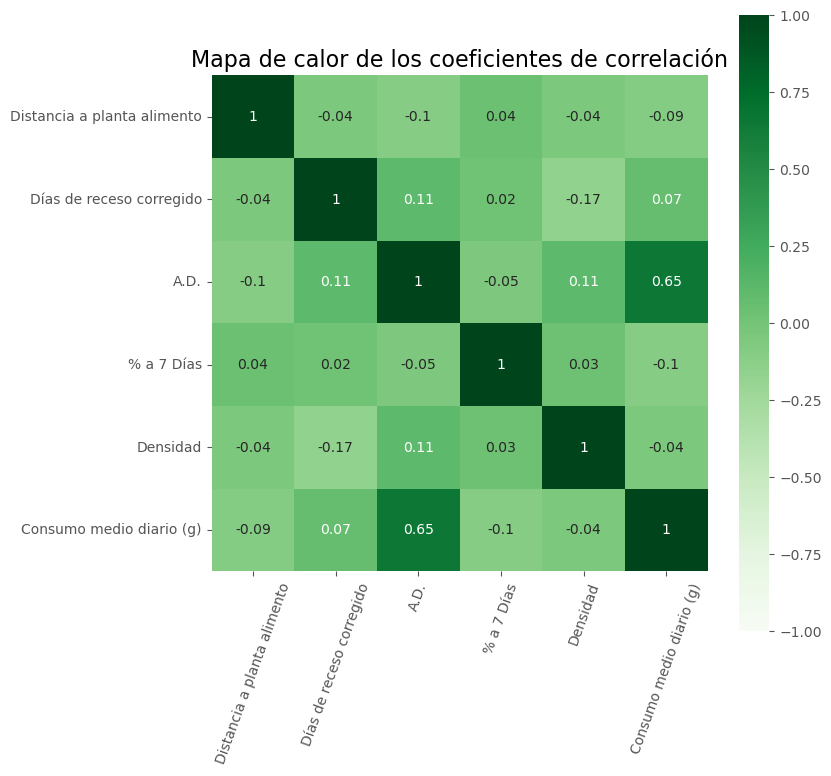

time: 485 ms (started: 2023-07-14 21:56:52 -03:00)


In [22]:
# Gráfico 
plt.figure(figsize = (8,8))
plt.axis('scaled')
sns.heatmap(dfa.corr().round(2), vmin=-1, vmax=1, cmap = "Greens", cbar = True, annot=True)
plt.xticks(rotation = 70)
plt.title('Mapa de calor de los coeficientes de correlación', fontsize = 16)



En el gráfico se observa la correlación previamente detectada entre la ganancia media diaria de peso y el consumo de alimento. El objetivo de aplicar modelos de agrupación es detectar si hay patrones de comportamiento similares teniendo en consideración las variables presentes en el subset: 
Distancia a planta de alimento: Se relaciona con la ubicación geográfica de las granjas, las granjas más alejadas se encuentran en zonas con peores condiciones climáticas.
Días de receso corregido: Cantidad de días transcurridos entre crianzas, se relaciona con las condiciones de limpieza y desinfección de los galpones al ingreso de las aves.
% a 7 días: Mortalidad de animales durante la primera semana de vida, es una medida indirecta del manejo de los encargados de las granjas y de la calidad de los pollitos BB recibidos.
Densidad: Cantidad de animales por m2 de galpón, en general las granjas con mayores densidades son aquellas que poseen un sistema de ventilación forzada y/o son de ambiente controlado.


## DBSCAN

Se genera un modelo de BSCAN con el objetivo de detectar si es posible agrupar las crianzas y granjas en función de que compartan similares características de distancia, manejo y condiciones de granja y, a su vez, tengan similares resultados de ganancia de peso y consumo de alimento.

In [69]:
X = dfa.values



time: 0 ns (started: 2023-07-14 22:55:32 -03:00)


In [112]:
db = DBSCAN(eps=15, min_samples=20).fit(X)
labels = db.labels_

# Número de cluster, ignora el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número estimado de clusters: %d" % n_clusters_)
print("Número estimado de puntos ruido (outliers): %d" % n_noise_)

Número estimado de clusters: 4
Número estimado de puntos ruido (outliers): 18
time: 1.67 s (started: 2023-07-14 23:54:52 -03:00)


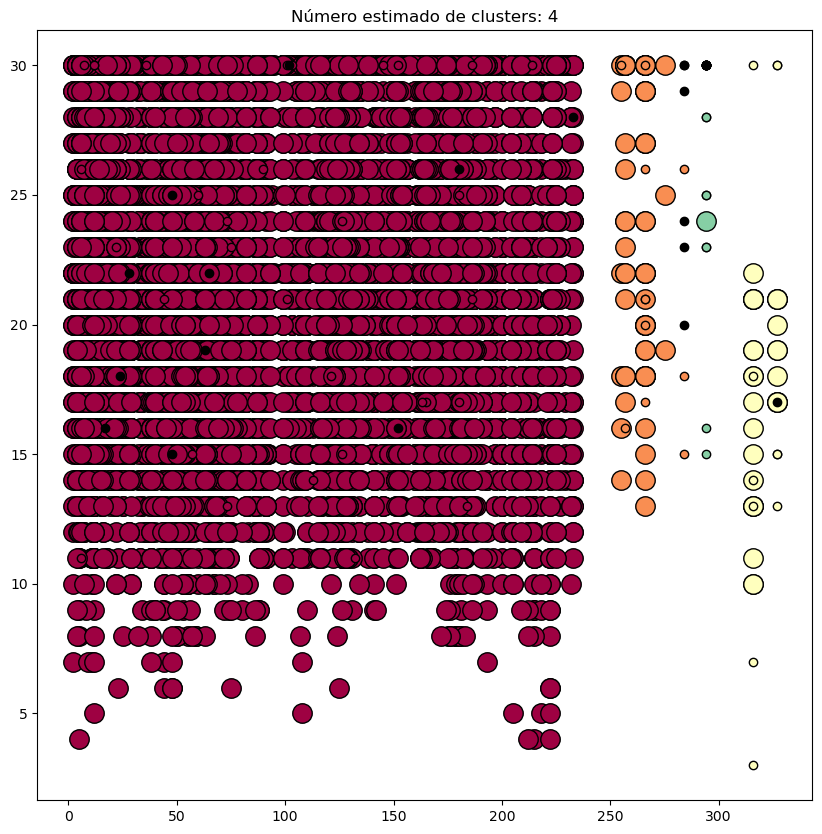

time: 391 ms (started: 2023-07-14 23:54:57 -03:00)


In [113]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Número estimado de clusters: {n_clusters_}")
plt.show();

Del gráfico se desprende que los grupos formados son muy disimiles en tamaño por lo cuál no sería de aplicación práctica utilizar este modelo. Se realiza un ajuste de los hiperparámetros para detectar si hay otra combinación mejor.

In [98]:
# Crea una matriz numpy a partir del DataFrame
X = dfa.values

# Define una lista de posibles valores para eps y min_samples
eps_values = [10, 15, 20, 25]
min_samples_values = [5, 10, 15, 20]

best_eps = eps_values[0]
best_min_samples = min_samples_values[0]
best_silhouette = float('-inf')  # Inicializar con un valor muy bajo

# Itera sobre todos los valores de los hiperparámetros
for eps in eps_values:
    for min_samples in min_samples_values:
        # Crear el objeto DBSCAN con los hiperparámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Aplica DBSCAN al conjunto de datos
        clusters = dbscan.fit_predict(X)

        # Verifica si se ha encontrado una mejor combinación de hiperparámetros
        if len(np.unique(clusters)) > 1:
            silhouette = silhouette_score(X, clusters)
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples

# Crea un nuevo objeto DBSCAN con los mejores hiperparámetros encontrados
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

# Aplica DBSCAN al conjunto de datos con los mejores hiperparámetros
clusters = best_dbscan.fit_predict(X)



time: 1min 22s (started: 2023-07-14 23:50:18 -03:00)


In [99]:
best_dbscan

DBSCAN(eps=10, min_samples=20)

time: 16 ms (started: 2023-07-14 23:51:47 -03:00)


Los mejores hiperparámetros para los datos analizados son un épsilon de 10 y tamaño mínimo de muestras de 20.

In [100]:
db = DBSCAN(eps=10, min_samples=20).fit(X)
labels = db.labels_

# Número de cluster, ignora el ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número estimado de clusters: %d" % n_clusters_)
print("Número estimado de puntos ruido (outliers): %d" % n_noise_)

Número estimado de clusters: 2
Número estimado de puntos ruido (outliers): 155
time: 813 ms (started: 2023-07-14 23:52:09 -03:00)


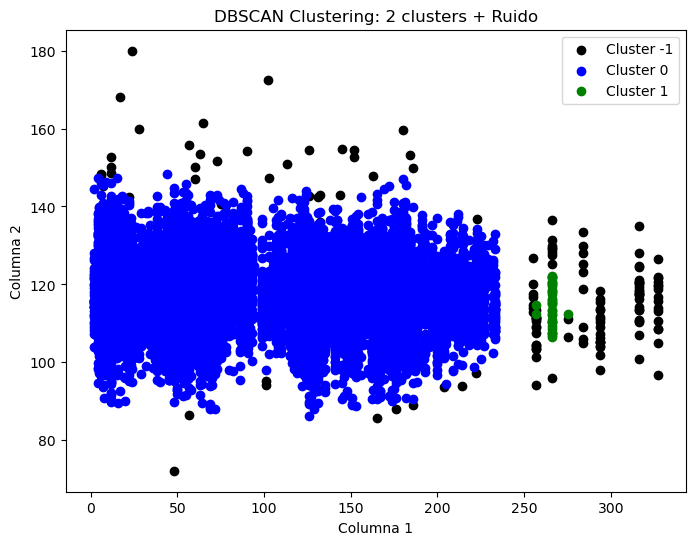

time: 390 ms (started: 2023-07-14 23:52:36 -03:00)


In [101]:
# Se obtiene la cantidad de clusters y su etiqueta asignada a cada punto
unique_labels = np.unique(clusters)
num_clusters = len(unique_labels) - 1  # Se resta 1 para contar el ruido como un cluster separado

# Se Crea una lista de colores para los puntos en el gráfico
colors = ['b', 'g', 'r', 'c', 'm', 'y','v','p','hotpink']

# Grafico de los puntos en un scatter plot con colores según los clusters asignados
plt.figure(figsize=(8, 6))
for cluster_label in unique_labels:
    if cluster_label == -1:
        # El ruido se representa con color negro
        color = 'k'
    else:
        # Se asigna un color a cada cluster
        color = colors[cluster_label % len(colors)]

    # Se obtienen los puntos que pertenecen al cluster actual
    cluster_points = X[clusters == cluster_label]

    # Gráfico 19 los puntos del cluster actual
    plt.scatter(cluster_points[:, 0], cluster_points[:, 5], color=color, label=f'Cluster {cluster_label}')

plt.title(f'DBSCAN Clustering: {num_clusters} clusters + Ruido')
plt.xlabel('Columna 1')
plt.ylabel('Columna 2')
plt.legend()
plt.show();





Luego de modificar los hiperparámetros este modelo continua sin ser de utilidad por lo que se utilizará un modelo alternativo.

## K Means

Se utilizará un modelo K-means para ver si hay relación entre los indicadores productivos y la localidad de producción de las zonas Buenos Aires y Entre Ríos.

## Localidades de Buenos Aires

In [116]:
dfk=df[['Distancia a planta alimento','Días de receso corregido','A.D.','% a 7 Días','mes ingreso','Densidad','Consumo medio diario (g)','localidad','zona prod' ]]


time: 0 ns (started: 2023-07-14 23:56:33 -03:00)


In [117]:
dfk=dfk[dfk['zona prod'] == 'BA']
dfk=dfk.drop(['zona prod'], axis=1)
dfk.head()

Distancia a planta alimento  Días de receso corregido   A.D.  % a 7 Días  \
0                         88.0                        14  54.49        0.55   
1                         75.0                        12  50.63        0.83   
2                        110.0                        11  56.12        0.92   
3                         74.0                         9  56.12        1.35   
4                         29.0                        10  60.98        0.76   

   mes ingreso   Densidad  Consumo medio diario (g)  localidad  
0           11  12.000000                115.963592  San Pedro  
1           11  10.454545                117.081839      Salto  
2           11   9.470000                127.820226  Chivilcoy  
3           11  10.000000                127.343729  San Pedro  
4           11  10.769231                138.304026  Arrecifes

time: 32 ms (started: 2023-07-14 23:56:36 -03:00)


In [118]:
len(dfk['localidad'].unique())

18

time: 0 ns (started: 2023-07-14 23:56:46 -03:00)


Hay 18 localidades de producción en la provincia de Buenos Aires.

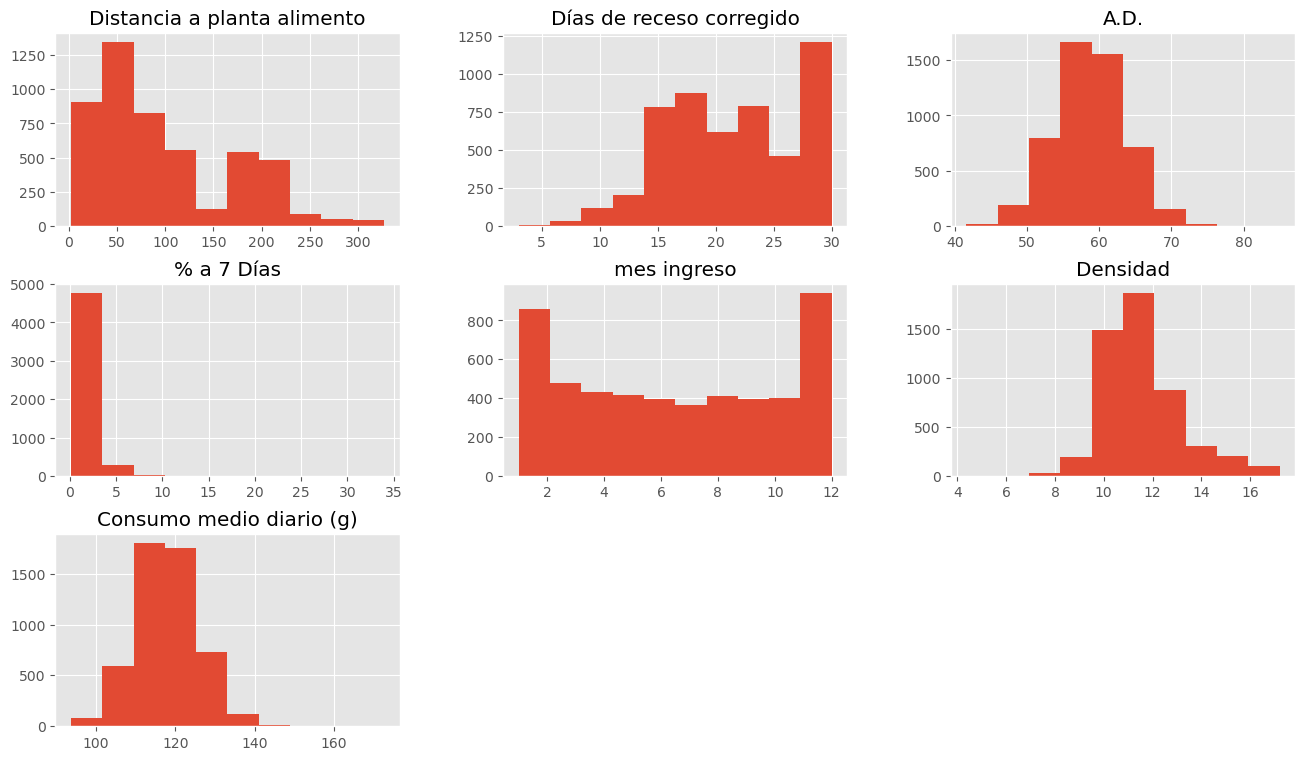

time: 813 ms (started: 2023-07-14 23:57:21 -03:00)


In [119]:
# Gráfico 20 Análisis de las variables

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


dfk.drop(['localidad'],axis=1).hist()
plt.show();

Hay dos grupos bien diferenciados de granjas en cuanto a su distancia a la planta de alimentos.La mayoría de los valores de días de receso es 30 días (este es un valor corregido que registra como 30 cada valor superior a esta cantidad de días). La ganancia de peso, la densidad y el consumo poseen una distribución normal. Los valores de mortalidad de primera semana se agrupan casi en su totalidad en valores entre 0 y 4 aproximadamente. 

In [120]:
X = np.array(dfk[['A.D.','Días de receso corregido','Densidad']])
y = np.array(dfk['localidad'])
X.shape

(5096, 3)

time: 0 ns (started: 2023-07-15 00:11:40 -03:00)


c:\Users\ebover\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


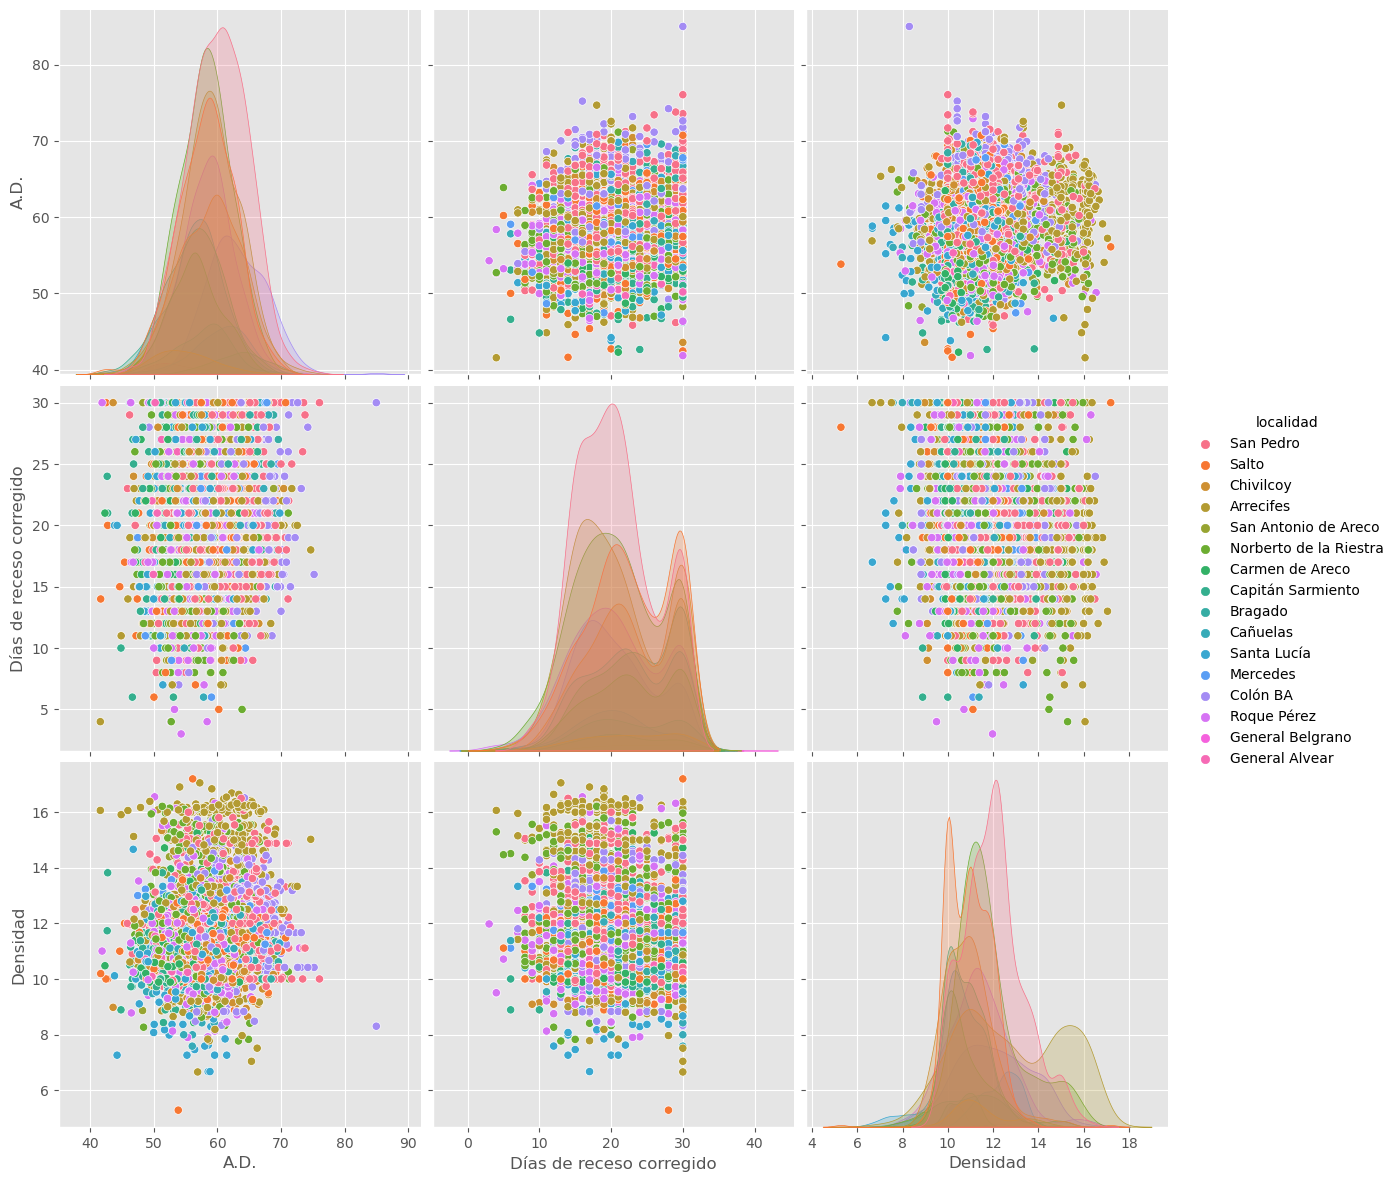

time: 5.06 s (started: 2023-07-15 00:12:02 -03:00)


In [121]:
#Gráfico 21
sns.pairplot(dfk.dropna(), hue='localidad',size=4,vars=['A.D.','Días de receso corregido','Densidad'],kind='scatter');

No habría relación entre las variables seleccionadas y la localidad geográfica.

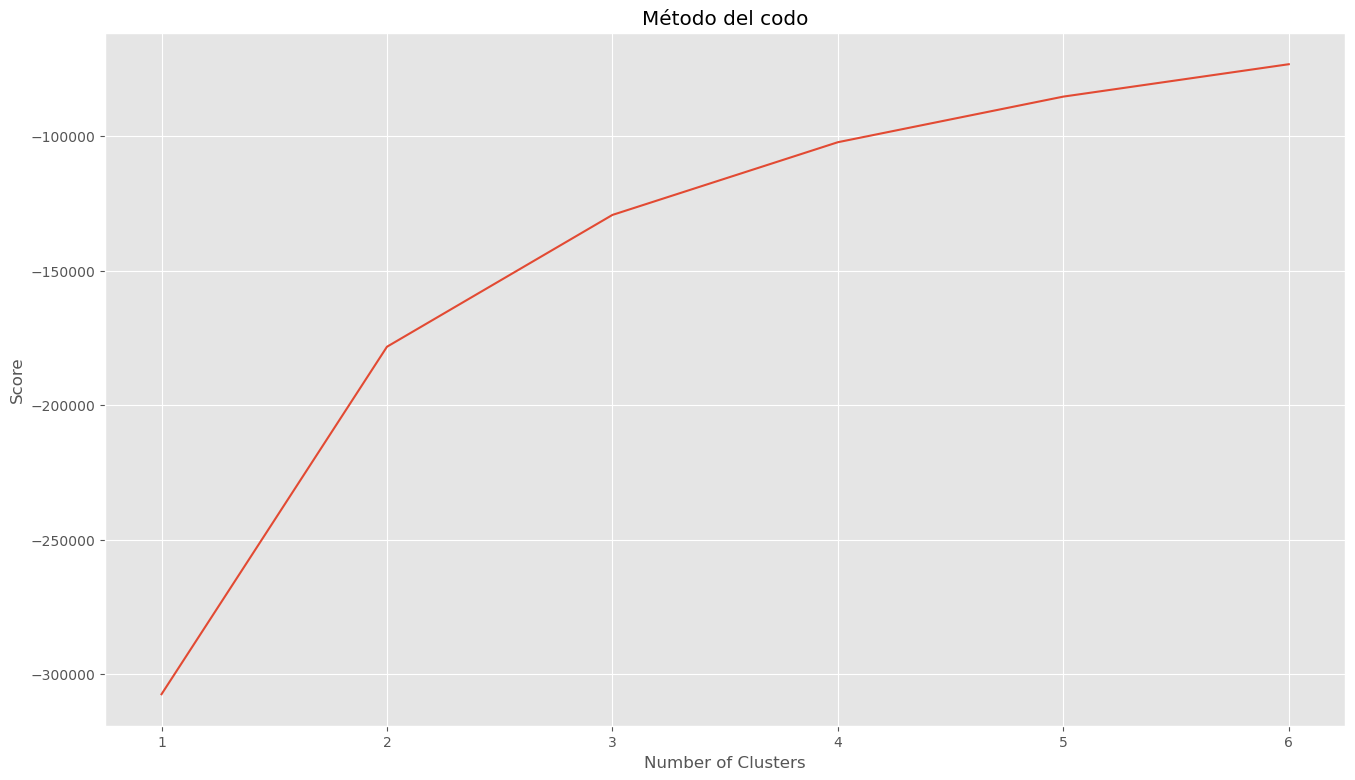

time: 1.66 s (started: 2023-07-15 00:12:41 -03:00)


In [122]:
#Gráfico 22

Nc = range(1, 7)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Método del codo')
plt.show()

In [132]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

time: 172 ms (started: 2023-07-15 00:15:17 -03:00)


In [133]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[59.1880886  28.05217859 11.07828017]
 [62.3672646  18.82745826 12.12672192]
 [54.4025254  16.93209877 11.54256647]]
time: 172 ms (started: 2023-07-15 00:15:19 -03:00)


C:\Users\ebover\AppData\Local\Temp\ipykernel_91232\2666153514.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


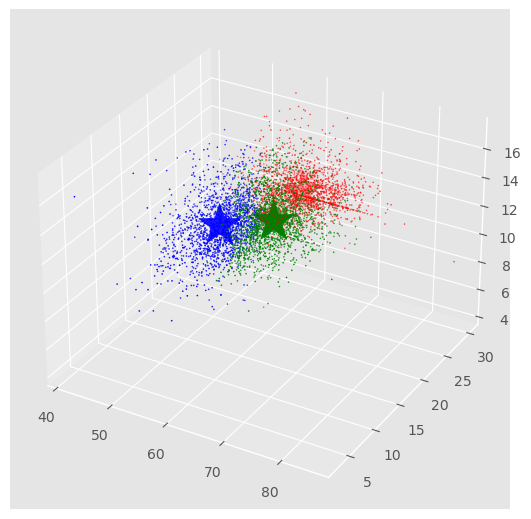

time: 375 ms (started: 2023-07-15 00:15:28 -03:00)


In [134]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.style.use('ggplot')

# Predicción de clusters
labels = kmeans.predict(X)
# se obtienen los centros
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
 #Gráfico 23
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=0.5)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000);

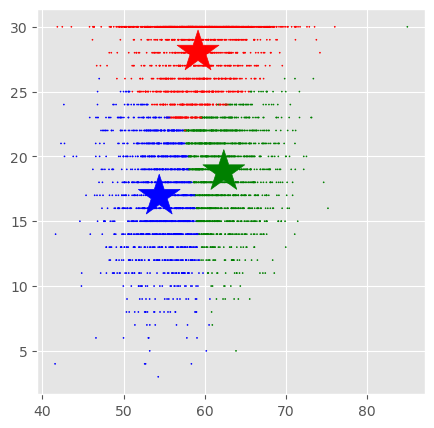

time: 218 ms (started: 2023-07-15 00:15:34 -03:00)


In [135]:
# Gráfico 24
f1 = dfk['A.D.'].values
f2 = dfk['Días de receso corregido'].values
 
plt.scatter(f1, f2, c=asignar, s=0.5)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

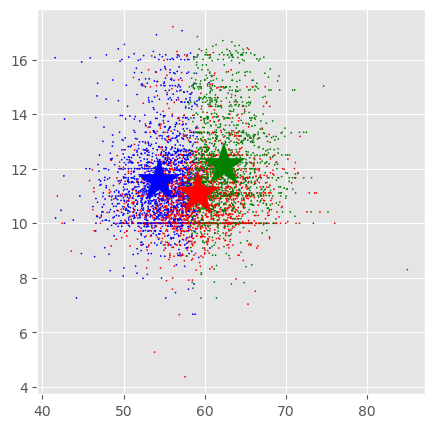

time: 234 ms (started: 2023-07-15 00:15:39 -03:00)


In [136]:
# Gráfico 25
f1 = dfk['A.D.'].values
f2 = dfk['Densidad'].values
 
plt.scatter(f1, f2, c=asignar, s=0.5)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

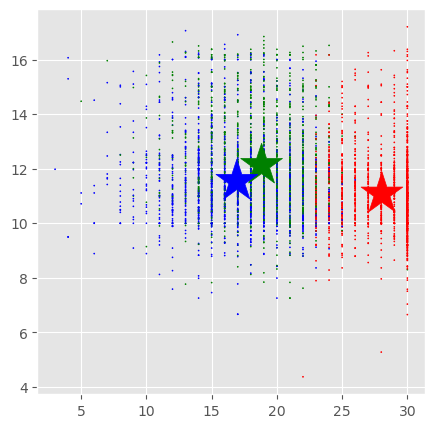

time: 203 ms (started: 2023-07-15 00:15:48 -03:00)


In [137]:
# Gráfico 26
f1 = dfk['Días de receso corregido'].values
f2 = dfk['Densidad'].values
 
plt.scatter(f1, f2, c=asignar, s=0.5)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [138]:
copy =  pd.DataFrame()
copy['localidad']=dfk['localidad'].values
copy['label'] = labels
copy

localidad  label
0       San Pedro      2
1           Salto      2
2       Chivilcoy      2
3       San Pedro      2
4       Arrecifes      1
...           ...    ...
5091  Roque Pérez      2
5092    San Pedro      2
5093  Roque Pérez      0
5094     Colón BA      0
5095  Roque Pérez      0

[5096 rows x 2 columns]

time: 0 ns (started: 2023-07-15 00:15:54 -03:00)


In [166]:
dic2={0:'red',1:'green',2:'blue'}
copy2=copy.replace({'label':dic2})

copy2

localidad  label
0       San Pedro   blue
1           Salto   blue
2       Chivilcoy   blue
3       San Pedro   blue
4       Arrecifes  green
...           ...    ...
5091  Roque Pérez   blue
5092    San Pedro   blue
5093  Roque Pérez    red
5094     Colón BA    red
5095  Roque Pérez    red

[5096 rows x 2 columns]

time: 32 ms (started: 2023-07-15 00:50:37 -03:00)


In [167]:
# Crea un nuevo dataframe con las columnas deseadas
nuevo_df = pd.pivot_table(copy2, index='localidad', columns='label', aggfunc=len, fill_value=0).reset_index()

# Imprime el nuevo dataframe
print(nuevo_df)

label               localidad  blue  green  red
0                   Arrecifes   186    235  175
1                     Bragado     5     25   14
2           Capitán Sarmiento   105     46  172
3             Carmen de Areco    96     25  106
4                    Cañuelas    43     27   58
5                   Chivilcoy   123    119  191
6                    Colón BA    41    198   79
7                     Escobar     0      2    1
8              General Alvear     8      0   11
9            General Belgrano     1      0    2
10                 Las Flores     0      3    3
11                   Mercedes    22     50   26
12     Norberto de la Riestra   251    184  216
13                Roque Pérez   171    131  157
14                      Salto   184    143  263
15       San Antonio de Areco    27      4   27
16                  San Pedro   235    377  229
17                Santa Lucía   123     50  126
time: 16 ms (started: 2023-07-15 00:50:41 -03:00)


In [168]:
localBA=nuevo_df.drop([1,7,8,9,10,15], axis=0)
localBA

label               localidad  blue  green  red
0                   Arrecifes   186    235  175
2           Capitán Sarmiento   105     46  172
3             Carmen de Areco    96     25  106
4                    Cañuelas    43     27   58
5                   Chivilcoy   123    119  191
6                    Colón BA    41    198   79
11                   Mercedes    22     50   26
12     Norberto de la Riestra   251    184  216
13                Roque Pérez   171    131  157
14                      Salto   184    143  263
16                  San Pedro   235    377  229
17                Santa Lucía   123     50  126

time: 16 ms (started: 2023-07-15 00:50:56 -03:00)


<Figure size 800x480 with 0 Axes>

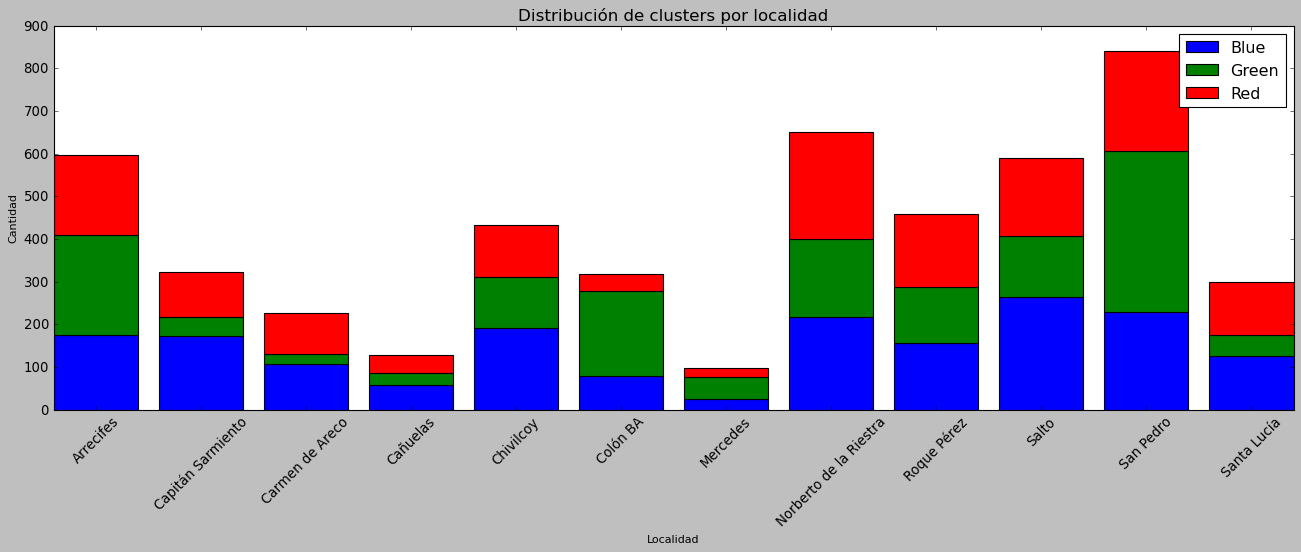

time: 687 ms (started: 2023-07-15 00:56:30 -03:00)


In [175]:
# Gráfico 27
plt.figure(figsize=(10, 6))
plt.style.use('classic')

parameters = {'axes.labelsize': 10,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)


# Obtiene los valores para cada categoría de label
red = localBA['red']
green = localBA['green']
blue = localBA['blue']

# Obtiene los nombres de las localidades
localidades = localBA['localidad']


# Configura el tamaño del gráfico
plt.figure(figsize=(20, 6))


# Crea el gráfico de barras apiladas
plt.bar(localidades, red, label='Blue')
plt.bar(localidades, green, bottom=red, label='Green')
plt.bar(localidades, blue, bottom=red+green, label='Red')

# Agrega leyendas y etiquetas
plt.xlabel('Localidad')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')
plt.title('Distribución de clusters por localidad')
plt.legend()

# Muestra el gráfico
plt.show();




Si bien no se distribuyen equitativamente, las 3 categorías conformadas por el modelo se encuentran presentes en todas las localidades por lo que la ubicación geográfica de las granjas no tendría una relación directa con la densidad, la ganancia de peso y los días de receso en Buenos Aires.

In [170]:
#Prueba con nuevos valores

X_new = np.array([[58,14,12]]) #valores nuevos de ganancia, días de receso y densidad
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[2]
time: 47 ms (started: 2023-07-15 00:53:48 -03:00)


Una crianza con esos valores pertenecerá al cluster n2: red

## Localidades de Entre Ríos

In [176]:
dfk2=df[['Distancia a planta alimento','Días de receso corregido','A.D.','% a 7 Días','mes ingreso','Densidad','Consumo medio diario (g)','localidad','zona prod']]


time: 31 ms (started: 2023-07-15 01:01:17 -03:00)


In [178]:
dfk2=dfk2[dfk2['zona prod'] == 'ER']
dfk2=dfk2.drop(['zona prod'], axis=1)
dfk2.head()

Distancia a planta alimento  Días de receso corregido   A.D.  \
5335                         48.0                        20  55.29   
5336                          6.0                        20  58.43   
5337                         44.0                        30  57.92   
5338                        141.0                        30  55.49   
5339                        183.0                        21  55.51   

      % a 7 Días  mes ingreso   Densidad  Consumo medio diario (g)  \
5335        1.42           11  11.047619                122.591884   
5336        1.51           11  11.885128                132.482377   
5337        1.45           11  10.000000                117.309912   
5338        1.10           11  11.600000                123.070884   
5339        0.92           11  11.000000                118.916113   

           localidad  
5335  Aldea Asunción  
5336       Gualeguay  
5337        Larroque  
5338        Rocamora  
5339       Villaguay

time: 31 ms (started: 2023-07-15 01:02:14 -03:00)


In [179]:
len(dfk2['localidad'].unique())

22

time: 15 ms (started: 2023-07-15 01:02:19 -03:00)


Hay 22 localidades de producción en la provincia de Entre Ríos.

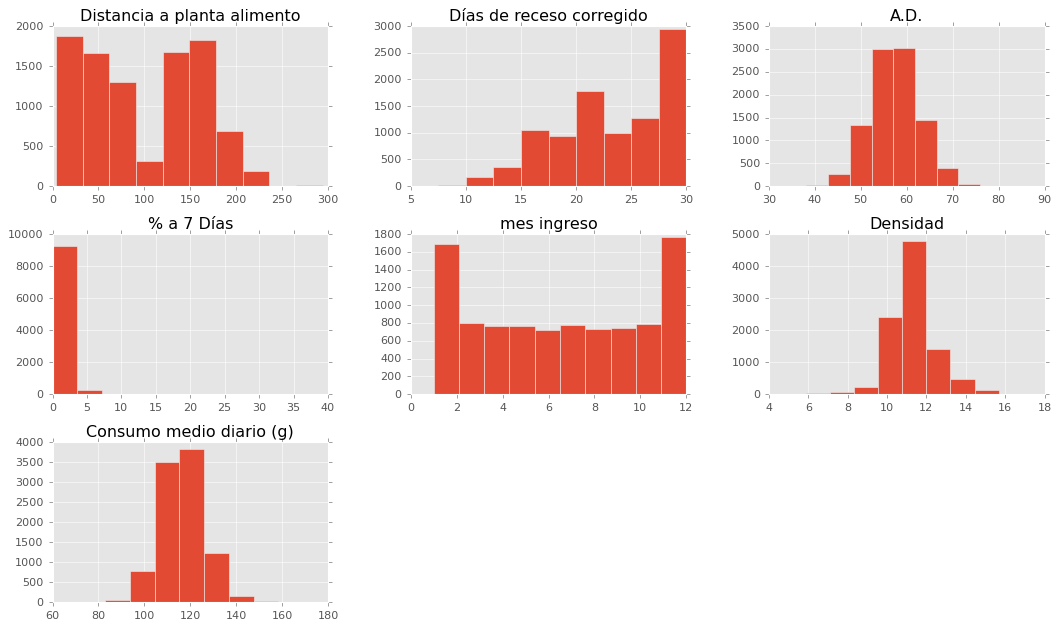

time: 907 ms (started: 2023-07-15 01:03:23 -03:00)


In [180]:
# Gráfico 27 Análisis de las variables

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


dfk2.drop(['localidad'],axis=1).hist()
plt.show();

Al igual que en Buenos Aires, hay dos grupos bien diferenciados de granjas en cuanto a su distancia a la planta de alimentos.La mayoría de los valores de días de receso es 30 días (este es un valor corregido que registra como 30 cada valor superior a esta cantidad de días). La ganancia de peso, la densidad y el consumo poseen una distribución normal. Los valores de mortalidad de primera semana se agrupan casi en su totalidad en valores entre 0 y 4 aproximadamente. 

In [181]:
X = np.array(dfk2[['A.D.','Días de receso corregido','Densidad']])
y = np.array(dfk2['localidad'])
X.shape

(9563, 3)

time: 0 ns (started: 2023-07-15 01:05:30 -03:00)


c:\Users\ebover\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


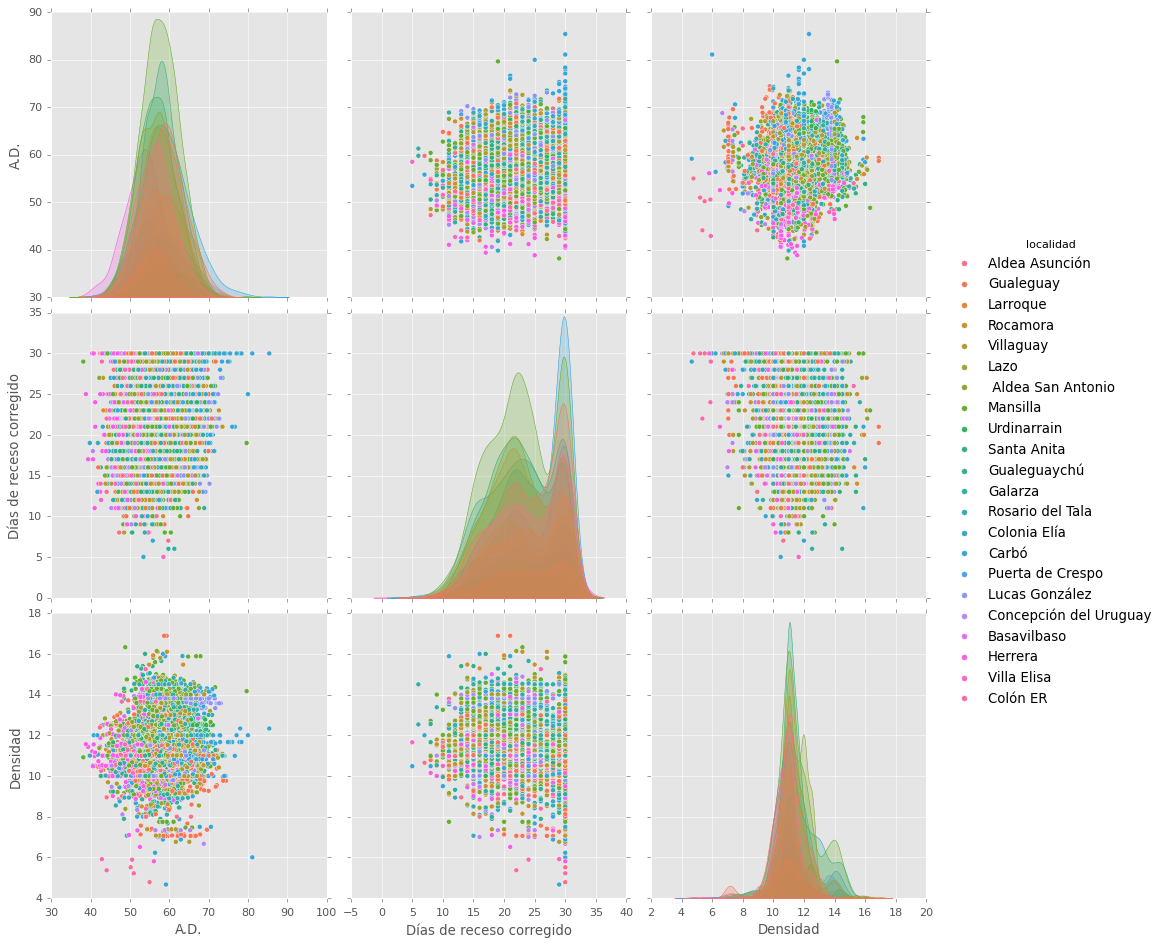

time: 7.09 s (started: 2023-07-15 01:05:52 -03:00)


In [182]:
#Gráfico 28
sns.pairplot(dfk2.dropna(), hue='localidad',size=4,vars=['A.D.','Días de receso corregido','Densidad'],kind='scatter');

No habría relación entre las variables seleccionadas y la localidad geográfica.

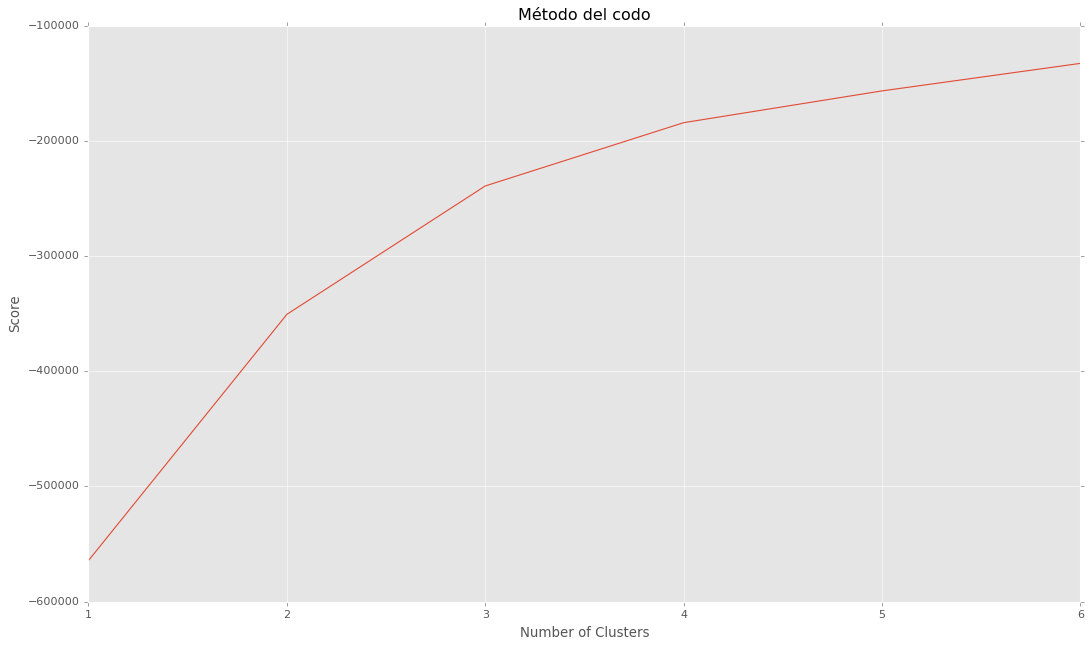

time: 1.62 s (started: 2023-07-15 01:07:12 -03:00)


In [183]:
#Gráfico 29
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
Nc = range(1, 7)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Método del codo')
plt.show()

In [184]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

time: 156 ms (started: 2023-07-15 01:07:40 -03:00)


In [185]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[54.46132118 27.74625468 11.13327074]
 [55.10777842 17.68561485 11.31675482]
 [63.19869992 25.10237032 11.30635413]]
time: 188 ms (started: 2023-07-15 01:07:43 -03:00)


C:\Users\ebover\AppData\Local\Temp\ipykernel_91232\877177735.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


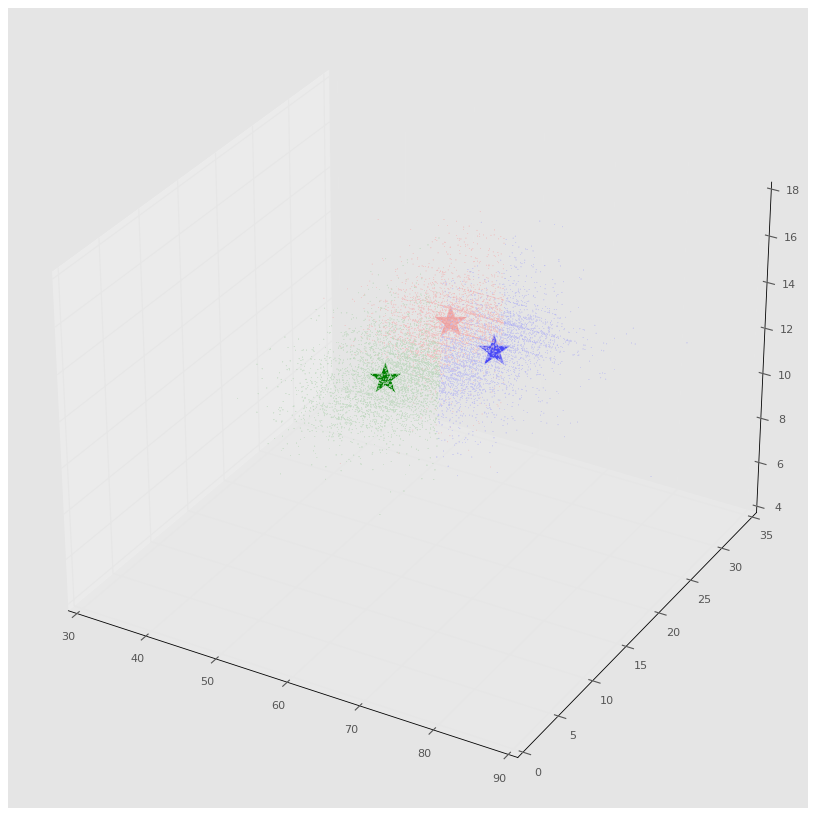

time: 469 ms (started: 2023-07-15 01:09:44 -03:00)


In [188]:

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Predicción the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
 #Gráfico 30
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=0.5)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000);

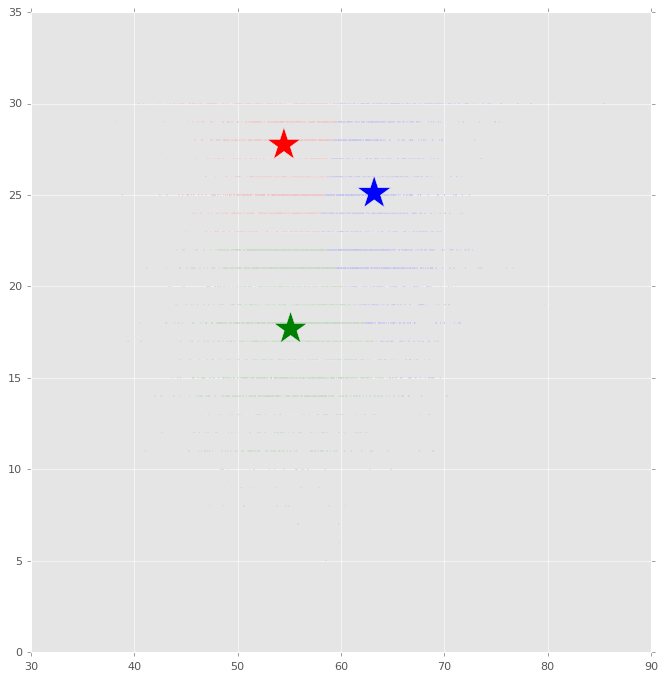

time: 329 ms (started: 2023-07-15 01:10:07 -03:00)


In [189]:
# Gráfico 31
f1 = dfk2['A.D.'].values
f2 = dfk2['Días de receso corregido'].values
 
plt.scatter(f1, f2, c=asignar, s=0.5)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

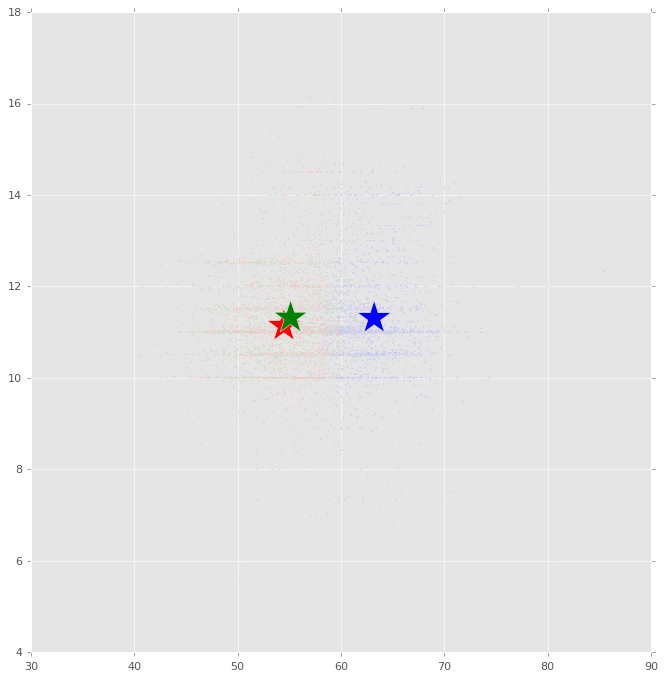

time: 266 ms (started: 2023-07-15 01:10:14 -03:00)


In [190]:
# Gráfico 32
f1 = dfk2['A.D.'].values
f2 = dfk2['Densidad'].values
 
plt.scatter(f1, f2, c=asignar, s=0.5)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

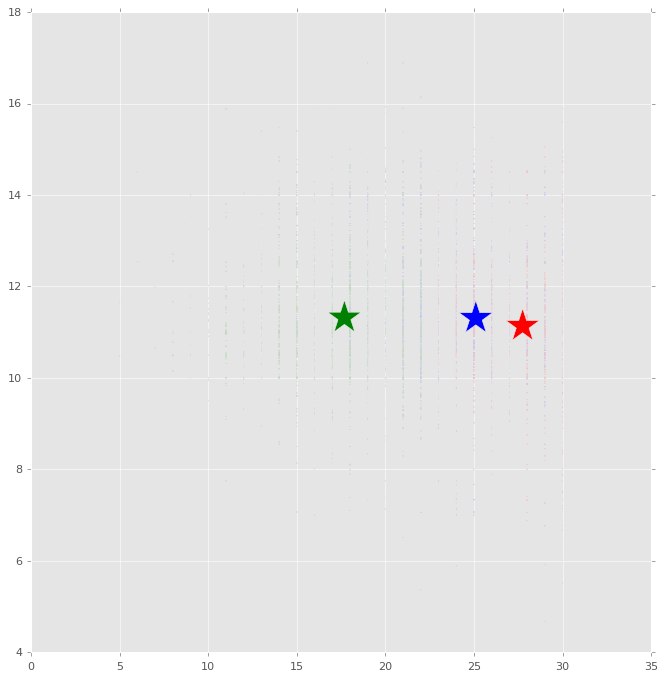

time: 359 ms (started: 2023-07-15 01:10:32 -03:00)


In [191]:
# Gráfico 33
f1 = dfk2['Días de receso corregido'].values
f2 = dfk2['Densidad'].values
 
plt.scatter(f1, f2, c=asignar, s=0.5)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [192]:
copy =  pd.DataFrame()
copy['localidad']=dfk2['localidad'].values
copy['label'] = labels
copy

localidad  label
0     Aldea Asunción      1
1          Gualeguay      1
2           Larroque      0
3           Rocamora      0
4          Villaguay      1
...              ...    ...
9558     Santa Anita      0
9559  Lucas González      0
9560  Lucas González      0
9561  Lucas González      2
9562    Gualeguaychú      0

[9563 rows x 2 columns]

time: 16 ms (started: 2023-07-15 01:10:42 -03:00)


In [193]:
dic2={0:'blue',1:'green',2:'red'}
copy2=copy.replace({'label':dic2})

copy2

localidad  label
0     Aldea Asunción  green
1          Gualeguay  green
2           Larroque   blue
3           Rocamora   blue
4          Villaguay  green
...              ...    ...
9558     Santa Anita   blue
9559  Lucas González   blue
9560  Lucas González   blue
9561  Lucas González    red
9562    Gualeguaychú   blue

[9563 rows x 2 columns]

time: 0 ns (started: 2023-07-15 01:11:50 -03:00)


In [194]:
# Se crea un nuevo dataframe con las columnas deseadas
nuevo_df = pd.pivot_table(copy2, index='localidad', columns='label', aggfunc=len, fill_value=0).reset_index()

# Se imprime el nuevo dataframe
print(nuevo_df)

label               localidad  blue  green  red
0           Aldea San Antonio   237    316  187
1              Aldea Asunción   228    201  131
2                 Basavilbaso    29     45   46
3                       Carbó   257    200  345
4                Colonia Elía   140     86   34
5                    Colón ER    64     38   17
6      Concepción del Uruguay   144    118   50
7                     Galarza   236    302  253
8                   Gualeguay   216    197  287
9                Gualeguaychú    49     79  100
10                    Herrera   280    202   44
11                   Larroque    74     57   30
12                       Lazo    85    129  187
13             Lucas González    63     90  136
14                   Mansilla   316    433  356
15           Puerta de Crespo    26     25   49
16                   Rocamora   163    142  108
17           Rosario del Tala    41     47   46
18                Santa Anita   247    337  187
19                Urdinarrain    29     

In [195]:
localER=nuevo_df.drop([2,5,15,17], axis=0)
localER

label               localidad  blue  green  red
0           Aldea San Antonio   237    316  187
1              Aldea Asunción   228    201  131
3                       Carbó   257    200  345
4                Colonia Elía   140     86   34
6      Concepción del Uruguay   144    118   50
7                     Galarza   236    302  253
8                   Gualeguay   216    197  287
9                Gualeguaychú    49     79  100
10                    Herrera   280    202   44
11                   Larroque    74     57   30
12                       Lazo    85    129  187
13             Lucas González    63     90  136
14                   Mansilla   316    433  356
16                   Rocamora   163    142  108
18                Santa Anita   247    337  187
19                Urdinarrain    29     47   63
20                Villa Elisa    96     76   34
21                  Villaguay   183    281  222

time: 15 ms (started: 2023-07-15 01:13:38 -03:00)


<Figure size 1600x480 with 0 Axes>

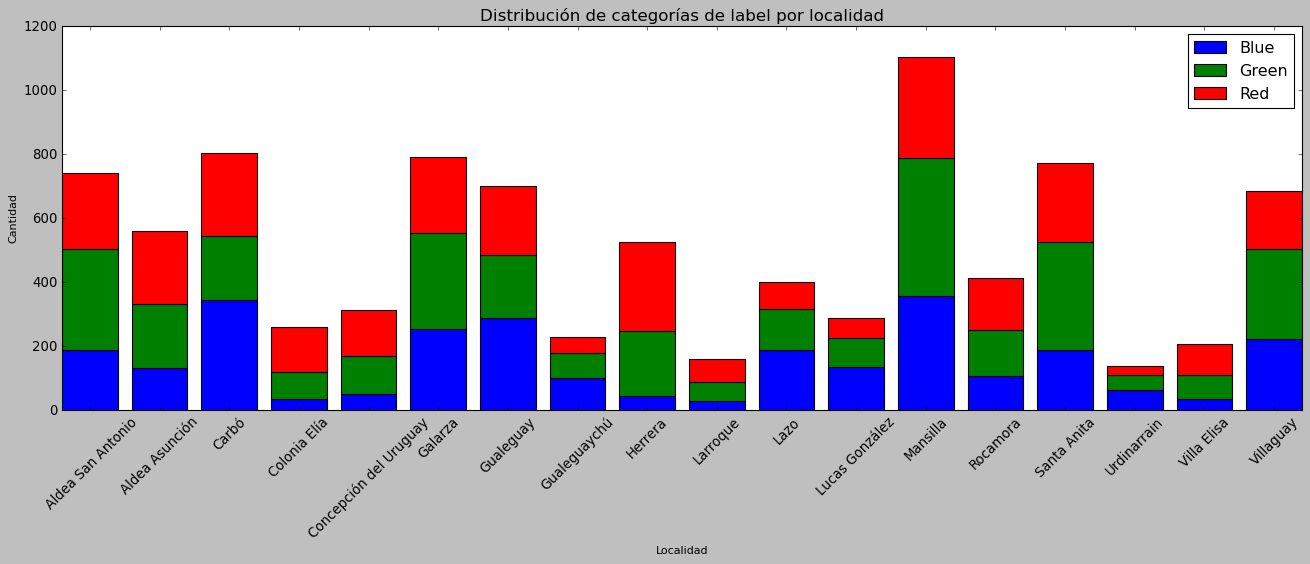

time: 672 ms (started: 2023-07-15 01:17:01 -03:00)


In [198]:
# Gráfico 34
plt.figure(figsize=(20, 6))
plt.style.use('classic')
parameters = {'axes.labelsize': 10,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)

# Obtener los valores para cada categoría de label
red = localER['red']
green = localER['green']
blue = localER['blue']

# Obtener los nombres de las localidades
localidades = localER['localidad']


# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 6))

# Crear el gráfico de barras apiladas
plt.bar(localidades, red, label='Blue')
plt.bar(localidades, green, bottom=red, label='Green')
plt.bar(localidades, blue, bottom=red+green, label='Red')

# Agregar leyendas y etiquetas
plt.xlabel('Localidad')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')
plt.title('Distribución de categorías de label por localidad')
plt.legend()

# Mostrar el gráfico
plt.show();




Si bien no se distribuyen equitativamente, las 3 categorías conformadas por el modelo se encuentran presentes en todas las localidades por lo que la ubicación geográfica de las granjas no tendría una relación directa con la densidad, la ganancia de peso y los días de receso en Entre Ríos.

In [199]:
#Prueba con nuevos valores

X_new = np.array([[60,10.5,20]]) #valores nuevos de ganancia, días de receso y densidad
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[1]
time: 32 ms (started: 2023-07-15 01:29:45 -03:00)


Una crianza con esos valores pertenecerá al cluster n1: green

# Conclusiones y consideraciones finales

Del análisis del presente trabajo surge que el crecimiento de los pollos parrilleros depende de múltiples factores y no de una única variable. El mes de ingreso de las aves a la granja y la estación del año en que se desarrolla la crianza indican que hay un impacto del clima sobre el desempeño. 
El sistema de ventilación de los galpones de tipo ventilación forzada y/o ambiente controlado permite obtener, en promedio, mayores valores de ganancia media diaria de peso.
La zona de producción Crespo tiene mejores resultados productivos pero la cantidad de datos de crianza es mucho menor que el resto de las zonas y, se observó también que los resultados son diferentes comparando los distintos años productivos.
El consumo de alimento fue la variable que tuvo mayor correlación con la ganancia media diaria de peso, debido a ello se utilizaron modelos de regresión para predecir este indicador y evaluar cuáles de las variables tenían mayor impacto en el consumo
